# **`NTT Data Foundation`**
## *Bootcamp Python Data Analyst*
## *Reto grupal 3: Análisis exploratorio básico y visualización de datos* 

## *`⚡Equipo:`*

#### - Nahuel Raul Lopez
#### - Jesús Gómez Beltrán
#### - Francisco Javier Cabaña
#### - Mariana Sueiro

## *`🌟Profesor:`*
#### - Antonio Jose Hernandez Herreros "Toni"

## *`⚙️Tutor Escuela talento digital:`*
#### - Laura Merlo
___________

## Información del reto:

### La entidad bancaria, nos facilita una base de datos con 10.000 registros de información que contienen las siguientes variables:
- RowNumber: número de registro.
- CustomerId: identificador único de cliente.
- Surname: apellido del cliente. 
- CreditScore: puntuación de crédito del cliente.
- Geography: estado del cliente.
- Gender: género del cliente.
- Age: edad del cliente.
- Tenure: número de años que el cliente lleva en el banco.
- Balance: balance del cliente.
- NumOfProducts: número de productos que el cliente tiene en el banco.
- HasCrCard: si el cliente tiene o no tarjeta de crédito.
- IsActiveMember: es cliente activo o no de la entidad.
- EstimatedSalary: salario que la entidad estima que ingresa mensualmente el cliente.
- Exited: es la variable objetivo:
    - 0: el cliente no abandonó la entidad
    - 1: el cliente abandonó la entidad

_________________
### `Ejercicio 1`
#### Leed el fichero de texto df_estados_bank.csv que se corresponde con el conjunto de datos a trabajar en este reto.
#### Realizad una correcta limpieza de datos inicial con el objetivo de preparar la base de datos previa a entrenar el modelo. Sin haber entrenado el modelo, dad respuesta a las siguientes preguntas: 
#### • ¿Consideráis que todas las variables del conjunto de datos son útiles de cara a la predicción? ¿Cuáles sí y cuáles no? Justificad vuestra respuesta.
#### • ¿A qué tipo de modelo os enfrentáis? Justificad vuestra respuesta
________________

#### *`Generando el dataframe (df)`*

In [2]:
import pandas as pd

path = r'c:\Users\jgome\OneDrive\Escritorio\DESARROLLO\Curso Phyton Data Analist\5.- RETOS\Área III.- Exploración básica y eliminación de datos con Phyton\df_estados_bank.csv'
df = pd.read_csv(path, sep=",")
df

,Unnamed: 0,RowNumber,CustomerId,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Surname,Exited,Tenure
0,0,1,15634602,619,Female,0.00,1,1,1,42.0,Texas,101348.88,Hargrave,1,2
1,1,2,15647311,608,Female,83807.86,1,0,1,41.0,California,112542.58,Hill,0,1
2,2,3,15619304,502,Female,159660.80,3,1,0,42.0,Texas,113931.57,Onio,1,8
3,3,4,15701354,699,Female,0.00,2,0,0,39.0,Texas,93826.63,Boni,0,1
4,4,5,15737888,850,Female,125510.82,1,1,1,43.0,California,79084.10,Mitchell,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,15606229,771,Male,0.00,2,1,0,39.0,Texas,96270.64,Obijiaku,0,5
9996,9996,9997,15569892,516,Male,57369.61,1,1,1,35.0,Texas,101699.77,Johnstone,0,10
9997,9997,9998,15584532,709,Female,0.00,1,0,1,NaN,Texas,42085.58,Liu,1,7
9998,9998,9999,15682355,772,Male,75075.31,2,1,0,42.0,Alabama,92888.52,Sabbatini,1,3


### **`Vamos a seguir este esquema de pasos para el EDA inicial`**

#### 1. Copiar el df y trabajar con la copia: `estados = df.copy()`
Crear una copia del DataFrame original antes de realizar modificaciones o limpieza es una buena práctica. Esto permite conservar los datos originales y tener un punto de referencia para comparar los cambios realizados.

#### 2. Variables categóricas: `estados.info()`
Información sobre las columnas del DataFrame y sus tipos de datos. Es especialmente útil para identificar las variables categóricas en el conjunto de datos.

#### 3. Medidas estadísticas importantes y útiles: `estados.describe()`
Brinda medidas estadísticas resumidas de las columnas numéricas. Esto incluye el recuento de valores, la media, la desviación estándar y los valores mínimo, máximo y cuartiles. Estas medidas estadísticas pueden ayudar a comprender la distribución y las características de los datos numéricos

#### 4: Registros duplicados: `estados.duplicated().sum()`
Permite verificar si hay registros duplicados en el DataFrame. Si el resultado es mayor que cero, significa que hay duplicados que deben ser tratados.

#### 5. Cantidad de nulos: `estados.isnull().sum()`
Muestra la cantidad de valores nulos en cada columna. Esto ayuda a identificar qué columnas tienen valores faltantes y en qué medida.

#### 6. Análisis de las variables, recategorización y limpieza.

#### *`1. Trabajando con la copia del df`*

In [3]:
estados = df.copy()
estados

,Unnamed: 0,RowNumber,CustomerId,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Surname,Exited,Tenure
0,0,1,15634602,619,Female,0.00,1,1,1,42.0,Texas,101348.88,Hargrave,1,2
1,1,2,15647311,608,Female,83807.86,1,0,1,41.0,California,112542.58,Hill,0,1
2,2,3,15619304,502,Female,159660.80,3,1,0,42.0,Texas,113931.57,Onio,1,8
3,3,4,15701354,699,Female,0.00,2,0,0,39.0,Texas,93826.63,Boni,0,1
4,4,5,15737888,850,Female,125510.82,1,1,1,43.0,California,79084.10,Mitchell,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,15606229,771,Male,0.00,2,1,0,39.0,Texas,96270.64,Obijiaku,0,5
9996,9996,9997,15569892,516,Male,57369.61,1,1,1,35.0,Texas,101699.77,Johnstone,0,10
9997,9997,9998,15584532,709,Female,0.00,1,0,1,NaN,Texas,42085.58,Liu,1,7
9998,9998,9999,15682355,772,Male,75075.31,2,1,0,42.0,Alabama,92888.52,Sabbatini,1,3


#### *`2. Variables categóricas`*

In [4]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10000 non-null  int64  
 1   RowNumber        10000 non-null  int64  
 2   CustomerId       10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Gender           10000 non-null  object 
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   Age              9360 non-null   float64
 10  Geography        10000 non-null  object 
 11  EstimatedSalary  9208 non-null   float64
 12  Surname          9706 non-null   object 
 13  Exited           10000 non-null  int64  
 14  Tenure           10000 non-null  int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 1.1+ MB


#### *`3. Médidas estadísticas importantes y útiles`*

In [5]:
estados.describe()

,Unnamed: 0,RowNumber,CustomerId,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,EstimatedSalary,Exited,Tenure
count,10000.00000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9360.000000,9208.000000,10000.000000,10000.000000
mean,4999.50000,5000.50000,1.569094e+07,650.528800,76485.889288,1.530200,0.70550,0.515100,38.874145,100294.790491,0.170300,7.217800
std,2886.89568,2886.89568,7.193619e+04,96.653299,62397.405202,0.581654,0.45584,0.499797,10.479944,57573.230328,0.375915,14.965552
min,0.00000,1.00000,1.556570e+07,350.000000,0.000000,1.000000,0.00000,0.000000,18.000000,11.580000,0.000000,0.000000
25%,2499.75000,2500.75000,1.562853e+07,584.000000,0.000000,1.000000,0.00000,0.000000,32.000000,51136.837500,0.000000,3.000000
50%,4999.50000,5000.50000,1.569074e+07,652.000000,97198.540000,1.000000,1.00000,1.000000,37.000000,100608.435000,0.000000,5.000000
75%,7499.25000,7500.25000,1.575323e+07,718.000000,127644.240000,2.000000,1.00000,1.000000,44.000000,149584.732500,0.000000,7.000000
max,9999.00000,10000.00000,1.581569e+07,850.000000,250898.090000,4.000000,1.00000,1.000000,92.000000,199992.480000,1.000000,100.000000


#### *`4. Registros duplicados`*

In [6]:
estados.duplicated().sum()

0

#### *`5. Cantidad de nulos`*

In [7]:
df.isnull().sum()

Unnamed: 0           0
RowNumber            0
CustomerId           0
CreditScore          0
Gender               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
Age                640
Geography            0
EstimatedSalary    792
Surname            294
Exited               0
Tenure               0
dtype: int64

### **`6. Análisis de las variables, recategorización y limpieza`**

#### `Analizando las variables:`

#### - RowNumber: número de registro.
#### - CustomerId: identificador único de cliente.
#### - Surname: apellido del cliente.
#### - CreditScore: puntuación de crédito del cliente.
#### - Geography: estado del cliente.
#### - Gender: género del cliente.
#### - Age: edad del cliente.
#### - Tenure: número de años que el cliente lleva en el banco.
#### - Balance: balance del cliente.
#### - NumOfProducts: número de productos que el cliente tiene en el banco.
#### - HasCrCard: si el cliente tiene o no tarjeta de crédito.
#### - IsActiveMember: es cliente activo o no de la entidad.
#### - EstimatedSalary: salario que la entidad estima que ingresa mensualmente el cliente.
#### - Exited: es la variable objetivo:
        • 0: el cliente no abandonó la entidad
        • 1: el cliente abandonó la entidad
_______    ____
#### - 0.  Unnamed: 0      -->     10000 non-null  `int64`    : La vamos a eliminar porque no aporta valor
#### - 1.  RowNumber       -->     10000 non-null  `int64`    : La vamos a eliminar porque no aporta valor
#### - 2.  CustomerId      -->     10000 non-null  `int64`    : La vamos a dejar tal cual como está
#### - 3.  CreditScore     -->     10000 non-null  `int64`    : La vamos a eliminar porque no aporta valor
#### - 4.  Gender          -->     10000 non-null  `object`   : La vamos a pasar a Categórica (female y male)
#### - 5.  Balance         -->     10000 non-null  `float64`  : La vamos a dejar tal cual como está
#### - 6.  NumOfProducts   -->     10000 non-null  `int64`    : La vamos a dejar tal cual como está
#### - 7.  HasCrCard       -->     10000 non-null  `int64`    : La vamos a pasar a Categórica (0 y 1)
#### - 8.  IsActiveMember  -->     10000 non-null  `int64`    : La vamos a pasar a Categórica (0 y 1)
#### - 9.  Age             -->      9360 non-null  `float64`  : La vamos a dejar tal cual como  está
#### - 10. Geography       -->     10000 non-null  `object`   : Categórica (California, Texas y Alabama)
#### - 11. EstimatedSalary -->      9208 non-null  `float64`  : La vamos a dejar tal cual como está
#### - 12. Surname         -->      9706 non-null  `object`   : La vamos a eliminar porque no aporta valor
#### - 13. Exited          -->     10000 non-null  `int64`    : La vamos a pasar a Categórica (0: se queda y 1: se va)
#### - 14. Tenure          -->     10000 non-null  `int64`    : La vamos a dejar tal cual como está

### *`Recategorización`*

In [8]:
# Recategorizando a tipo category:
estados[['Gender', 'HasCrCard', 'IsActiveMember', 'Geography', 'Exited']] = estados[['Gender', 'HasCrCard', 'IsActiveMember', 'Geography', 'Exited']].astype('category')

In [9]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       10000 non-null  int64   
 1   RowNumber        10000 non-null  int64   
 2   CustomerId       10000 non-null  int64   
 3   CreditScore      10000 non-null  int64   
 4   Gender           10000 non-null  category
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   Age              9360 non-null   float64 
 10  Geography        10000 non-null  category
 11  EstimatedSalary  9208 non-null   float64 
 12  Surname          9706 non-null   object  
 13  Exited           10000 non-null  category
 14  Tenure           10000 non-null  int64   
dtypes: category(5), float64(3), int64(6), object(1)
memory usage: 830.8+ KB


#### **Verificando que "Unnamed: 0" y "RowNumber" tienen la misma cantidad de registros que el CustomerId**

In [10]:
num_distinct_values = estados['Unnamed: 0'].unique()
print (f'Unnamed: 0 --> {num_distinct_values}\n')

num_distinct_values2 = df['RowNumber'].unique()
print (f'RowNumber --> {num_distinct_values2}')

Unnamed: 0 --> [   0    1    2 ... 9997 9998 9999]

RowNumber --> [    1     2     3 ...  9998  9999 10000]


### Verificando que "Unnamed: 0" y "RowNumber" no tienen duplicados

In [11]:
num_distinct_values = estados['Unnamed: 0'].duplicated().sum()
print (f'Unnamed: 0 --> {num_distinct_values}\n')

num_distinct_values2 = estados['RowNumber'].duplicated().sum()
print (f'RowNumber --> {num_distinct_values2}')

Unnamed: 0 --> 0

RowNumber --> 0


### Conclusión: "Unnamed: 0" y "RowNumber" pueden ser eliminados

In [12]:
# eliminando "Unnamed: 0" y "RowNumber":
estados2 = estados.copy()

estados2 = estados2.drop(columns = 'Unnamed: 0')
estados2 = estados2.drop(columns = 'RowNumber')

# Información actual de nuestras variables
estados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   CreditScore      10000 non-null  int64   
 2   Gender           10000 non-null  category
 3   Balance          10000 non-null  float64 
 4   NumOfProducts    10000 non-null  int64   
 5   HasCrCard        10000 non-null  category
 6   IsActiveMember   10000 non-null  category
 7   Age              9360 non-null   float64 
 8   Geography        10000 non-null  category
 9   EstimatedSalary  9208 non-null   float64 
 10  Surname          9706 non-null   object  
 11  Exited           10000 non-null  category
 12  Tenure           10000 non-null  int64   
dtypes: category(5), float64(3), int64(4), object(1)
memory usage: 674.6+ KB


### Verificando duplicados después de eliminar las variables "Unnamed: 0" y "RowNumber"

In [13]:
estados2.duplicated().sum()

0

#### Eliminando variables Surname y CreditScore

In [14]:
estados2 = estados2.drop(columns = 'Surname')
estados2 = estados2.drop(columns = 'CreditScore')

#### Verificando duplicados después de eliminar las variables  "Surname y CreditScore"

In [15]:
estados2.duplicated().sum()

0

#### Trabajando cada variable que necesitamos de forma individual:
- Gender
- Geography

#### La variables Gender tiene dos tipos de datos: 
- Female
- Male

#### La variable Geography tiene 3 tipos de datos: California, Texas y Alabama. 
#### Vamos a sustir estos datos por:

- Alabama: 1
- California: 2
- Texas: 3

In [16]:
estados2

,CustomerId,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure
0,15634602,Female,0.00,1,1,1,42.0,Texas,101348.88,1,2
1,15647311,Female,83807.86,1,0,1,41.0,California,112542.58,0,1
2,15619304,Female,159660.80,3,1,0,42.0,Texas,113931.57,1,8
3,15701354,Female,0.00,2,0,0,39.0,Texas,93826.63,0,1
4,15737888,Female,125510.82,1,1,1,43.0,California,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Male,0.00,2,1,0,39.0,Texas,96270.64,0,5
9996,15569892,Male,57369.61,1,1,1,35.0,Texas,101699.77,0,10
9997,15584532,Female,0.00,1,0,1,NaN,Texas,42085.58,1,7
9998,15682355,Male,75075.31,2,1,0,42.0,Alabama,92888.52,1,3


In [17]:
def cambiar_datos_gender(x):
    if (x == 'Female'):
        return 0
    elif(x == 'Male'):
        return 1

estados2['Gender'] = estados2['Gender'].map(cambiar_datos_gender)

In [18]:
def cambiar_datos_geography(x):
    if (x == 'Alabama'):
        return 1
    elif(x == 'California'):
        return 2
    elif(x == 'Texas'):
        return 3

estados2['Geography'] = estados2['Geography'].map(cambiar_datos_geography)

In [19]:
# Comprobando el dataframe con sus variable recategorizadas
estados2

,CustomerId,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure
0,15634602,0,0.00,1,1,1,42.0,3,101348.88,1,2
1,15647311,0,83807.86,1,0,1,41.0,2,112542.58,0,1
2,15619304,0,159660.80,3,1,0,42.0,3,113931.57,1,8
3,15701354,0,0.00,2,0,0,39.0,3,93826.63,0,1
4,15737888,0,125510.82,1,1,1,43.0,2,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1,0.00,2,1,0,39.0,3,96270.64,0,5
9996,15569892,1,57369.61,1,1,1,35.0,3,101699.77,0,10
9997,15584532,0,0.00,1,0,1,NaN,3,42085.58,1,7
9998,15682355,1,75075.31,2,1,0,42.0,1,92888.52,1,3


### Comprobando la variable "Tenure"

In [20]:
estados2['Tenure'].value_counts()

Tenure
2      1048
1      1035
7      1028
8      1025
5      1012
3      1009
4       989
9       984
6       967
0       413
100     245
10      245
Name: count, dtype: int64

### Verificando la edad mínima y máxima los clientes:

In [21]:
print(estados2.Age.min())
print(estados2.Age.max())

18.0
92.0


### Viendo la variable "Tenure" observamos que hay un valor sin sentido 
#### No tiene sentido 245 registros de 100 años, ya que además de ser totalmente ilógico el valor, la máxima edad de los clientes es 92. Por esto decidimos eliminarlos.

In [22]:
# Eliminar el valor 100 de la variable Tenure:
estados2 = estados2[estados2['Tenure'] != 100]
estados2['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
0      413
10     245
Name: count, dtype: int64

#### Volvemos a comprobar duplicados después de eliminar valores

In [23]:
estados2.duplicated().sum()

0

In [24]:
estados2

,CustomerId,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure
0,15634602,0,0.00,1,1,1,42.0,3,101348.88,1,2
1,15647311,0,83807.86,1,0,1,41.0,2,112542.58,0,1
2,15619304,0,159660.80,3,1,0,42.0,3,113931.57,1,8
3,15701354,0,0.00,2,0,0,39.0,3,93826.63,0,1
4,15737888,0,125510.82,1,1,1,43.0,2,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1,0.00,2,1,0,39.0,3,96270.64,0,5
9996,15569892,1,57369.61,1,1,1,35.0,3,101699.77,0,10
9997,15584532,0,0.00,1,0,1,NaN,3,42085.58,1,7
9998,15682355,1,75075.31,2,1,0,42.0,1,92888.52,1,3


In [25]:
num_distinct_values = estados2['CustomerId'].unique()
print (f'CustomerId --> {num_distinct_values}\n')

estados2['CustomerId'].value_counts()

CustomerId --> [15634602 15647311 15619304 ... 15584532 15682355 15628319]



CustomerId
15634602    1
15623346    1
15799998    1
15703763    1
15795640    1
           ..
15720508    1
15599078    1
15702300    1
15660735    1
15628319    1
Name: count, Length: 9755, dtype: int64

In [26]:
estados2.CustomerId.value_counts()

CustomerId
15634602    1
15623346    1
15799998    1
15703763    1
15795640    1
           ..
15720508    1
15599078    1
15702300    1
15660735    1
15628319    1
Name: count, Length: 9755, dtype: int64

In [27]:
consulta = estados2[ ['CustomerId', 'NumOfProducts']]
consulta

,CustomerId,NumOfProducts
0,15634602,1
1,15647311,1
2,15619304,3
3,15701354,2
4,15737888,1
...,...,...
9995,15606229,2
9996,15569892,1
9997,15584532,1
9998,15682355,2


In [28]:
consulta2 = estados2[ ['CustomerId', 'IsActiveMember', 'NumOfProducts', 'Balance']]
consulta2

,CustomerId,IsActiveMember,NumOfProducts,Balance
0,15634602,1,1,0.00
1,15647311,1,1,83807.86
2,15619304,0,3,159660.80
3,15701354,0,2,0.00
4,15737888,1,1,125510.82
...,...,...,...,...
9995,15606229,0,2,0.00
9996,15569892,1,1,57369.61
9997,15584532,1,1,0.00
9998,15682355,0,2,75075.31


In [29]:
estados2

,CustomerId,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure
0,15634602,0,0.00,1,1,1,42.0,3,101348.88,1,2
1,15647311,0,83807.86,1,0,1,41.0,2,112542.58,0,1
2,15619304,0,159660.80,3,1,0,42.0,3,113931.57,1,8
3,15701354,0,0.00,2,0,0,39.0,3,93826.63,0,1
4,15737888,0,125510.82,1,1,1,43.0,2,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1,0.00,2,1,0,39.0,3,96270.64,0,5
9996,15569892,1,57369.61,1,1,1,35.0,3,101699.77,0,10
9997,15584532,0,0.00,1,0,1,NaN,3,42085.58,1,7
9998,15682355,1,75075.31,2,1,0,42.0,1,92888.52,1,3


In [30]:
estados2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9755 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       9755 non-null   int64   
 1   Gender           9755 non-null   category
 2   Balance          9755 non-null   float64 
 3   NumOfProducts    9755 non-null   int64   
 4   HasCrCard        9755 non-null   category
 5   IsActiveMember   9755 non-null   category
 6   Age              9132 non-null   float64 
 7   Geography        9755 non-null   category
 8   EstimatedSalary  8979 non-null   float64 
 9   Exited           9755 non-null   category
 10  Tenure           9755 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 581.7 KB


In [31]:
estados2.describe()

,CustomerId,Balance,NumOfProducts,Age,EstimatedSalary,Tenure
count,9.755000e+03,9755.000000,9755.000000,9132.000000,8979.000000,9755.000000
mean,1.569082e+07,76545.388684,1.529062,38.858739,100353.922099,4.887545
std,7.196389e+04,62472.069955,0.580465,10.476731,57627.646981,2.816798
min,1.556570e+07,0.000000,1.000000,18.000000,11.580000,0.000000
25%,1.562830e+07,0.000000,1.000000,32.000000,51257.330000,2.000000
50%,1.569055e+07,97286.160000,1.000000,37.000000,100686.110000,5.000000
75%,1.575314e+07,127725.745000,2.000000,44.000000,149603.360000,7.000000
max,1.581569e+07,250898.090000,4.000000,92.000000,199992.480000,10.000000


In [33]:
estados2.isnull().sum()

CustomerId           0
Gender               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
Age                623
Geography            0
EstimatedSalary    776
Exited               0
Tenure               0
dtype: int64

#### **Verificamos que no existen clientes que no tengan productos**

In [34]:
estados2.NumOfProducts.min()

1

estados2.duplicated().sum()

#### Hacemos copia del dataframe

In [35]:
estados3 = estados2.copy()
estados3

,CustomerId,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure
0,15634602,0,0.00,1,1,1,42.0,3,101348.88,1,2
1,15647311,0,83807.86,1,0,1,41.0,2,112542.58,0,1
2,15619304,0,159660.80,3,1,0,42.0,3,113931.57,1,8
3,15701354,0,0.00,2,0,0,39.0,3,93826.63,0,1
4,15737888,0,125510.82,1,1,1,43.0,2,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1,0.00,2,1,0,39.0,3,96270.64,0,5
9996,15569892,1,57369.61,1,1,1,35.0,3,101699.77,0,10
9997,15584532,0,0.00,1,0,1,NaN,3,42085.58,1,7
9998,15682355,1,75075.31,2,1,0,42.0,1,92888.52,1,3


In [36]:
estados3.isnull().sum()

CustomerId           0
Gender               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
Age                623
Geography            0
EstimatedSalary    776
Exited               0
Tenure               0
dtype: int64

#### **Trabajando los nulos de Age**

In [37]:
estados3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9755 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       9755 non-null   int64   
 1   Gender           9755 non-null   category
 2   Balance          9755 non-null   float64 
 3   NumOfProducts    9755 non-null   int64   
 4   HasCrCard        9755 non-null   category
 5   IsActiveMember   9755 non-null   category
 6   Age              9132 non-null   float64 
 7   Geography        9755 non-null   category
 8   EstimatedSalary  8979 non-null   float64 
 9   Exited           9755 non-null   category
 10  Tenure           9755 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 581.7 KB


In [38]:
estados3.Age = estados3.Age.fillna(estados3.Age.median())
estados3.isnull().sum()

CustomerId           0
Gender               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
Age                  0
Geography            0
EstimatedSalary    776
Exited               0
Tenure               0
dtype: int64

In [39]:
estados3.EstimatedSalary.median()

100686.11

#### Salaria mínimo y máximo

In [41]:
print(estados3.EstimatedSalary.min())
print(estados3.EstimatedSalary.max())

11.58
199992.48


In [42]:
estados3.describe()

,CustomerId,Balance,NumOfProducts,Age,EstimatedSalary,Tenure
count,9.755000e+03,9755.000000,9755.000000,9755.000000,8979.000000,9755.000000
mean,1.569082e+07,76545.388684,1.529062,38.740031,100353.922099,4.887545
std,7.196389e+04,62472.069955,0.580465,10.146814,57627.646981,2.816798
min,1.556570e+07,0.000000,1.000000,18.000000,11.580000,0.000000
25%,1.562830e+07,0.000000,1.000000,32.000000,51257.330000,2.000000
50%,1.569055e+07,97286.160000,1.000000,37.000000,100686.110000,5.000000
75%,1.575314e+07,127725.745000,2.000000,43.000000,149603.360000,7.000000
max,1.581569e+07,250898.090000,4.000000,92.000000,199992.480000,10.000000


#### **Imputando el salario por la mediana**

In [43]:
estados3.EstimatedSalary = estados3.EstimatedSalary.fillna(estados3.EstimatedSalary.median())
estados3.isnull().sum()

CustomerId         0
Gender             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Age                0
Geography          0
EstimatedSalary    0
Exited             0
Tenure             0
dtype: int64

#### VOLVEMOS A PONER BANDERA

In [45]:
estados_sin_nulos = estados3.copy()
estados_sin_nulos

,CustomerId,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure
0,15634602,0,0.00,1,1,1,42.0,3,101348.88,1,2
1,15647311,0,83807.86,1,0,1,41.0,2,112542.58,0,1
2,15619304,0,159660.80,3,1,0,42.0,3,113931.57,1,8
3,15701354,0,0.00,2,0,0,39.0,3,93826.63,0,1
4,15737888,0,125510.82,1,1,1,43.0,2,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1,0.00,2,1,0,39.0,3,96270.64,0,5
9996,15569892,1,57369.61,1,1,1,35.0,3,101699.77,0,10
9997,15584532,0,0.00,1,0,1,37.0,3,42085.58,1,7
9998,15682355,1,75075.31,2,1,0,42.0,1,92888.52,1,3


#### **Recategorización de variables terminada**
#### Comenzamos con los `outliers`

- CreditScore
- Balance
- NumOfProducts
- Age
- EstimatedSalary	
- Tenure

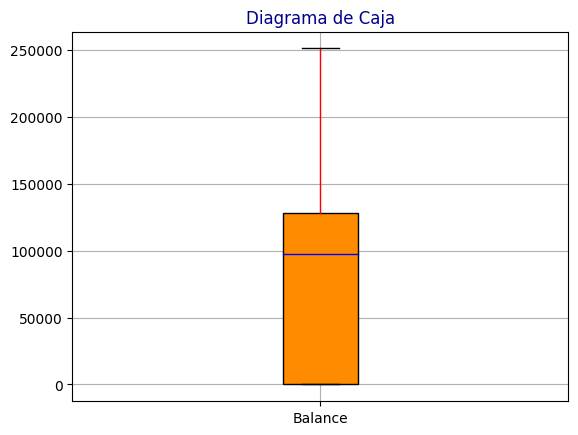

In [48]:
##### Balance #####
import matplotlib.pyplot as plt

# Seleccionando las columnas
# columnas = ['Balance']

# Creando el diagrama de caja con estilos 
estados_sin_nulos[['Balance']].boxplot( 
            patch_artist=True, 
            boxprops={'facecolor': 'darkorange', 'linewidth': 1}, 
            whiskerprops={'color': 'red'},
            medianprops={'color': 'blue'})

# Configurando el título y etiquetas de los ejes
plt.title("Diagrama de Caja", color='darkblue')

# Mostrando el diagrama de caja
plt.show()

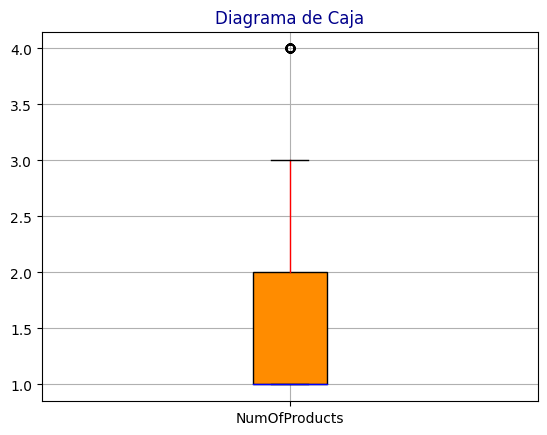

In [49]:
##### NumOfProducts #####
import matplotlib.pyplot as plt

# Creando el diagrama de caja con estilos 
estados_sin_nulos[['NumOfProducts']].boxplot( 
            patch_artist=True, 
            boxprops={'facecolor': 'darkorange', 'linewidth': 1}, 
            whiskerprops={'color': 'red'},
            medianprops={'color': 'blue'})

# Configurando el título y etiquetas de los ejes
plt.title("Diagrama de Caja", color='darkblue')
# Mostrando el diagrama de caja
plt.show()

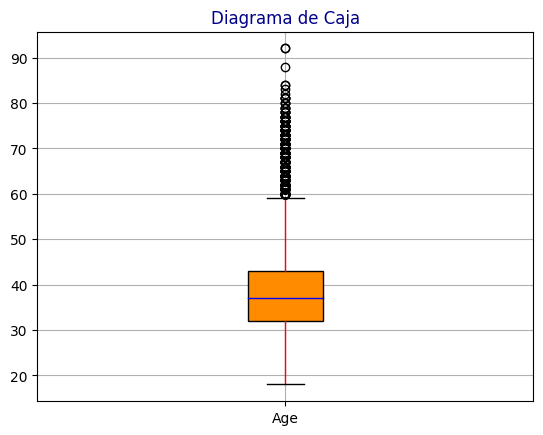

In [50]:
##### Age #####
import matplotlib.pyplot as plt

# Creando el diagrama de caja con estilos 
estados_sin_nulos[['Age']].boxplot( 
            patch_artist=True, 
            boxprops={'facecolor': 'darkorange', 'linewidth': 1}, 
            whiskerprops={'color': 'red'},
            medianprops={'color': 'blue'})

# Configurando el título y etiquetas de los ejes
plt.title("Diagrama de Caja", color='darkblue')
# Mostrando el diagrama de caja
plt.show()

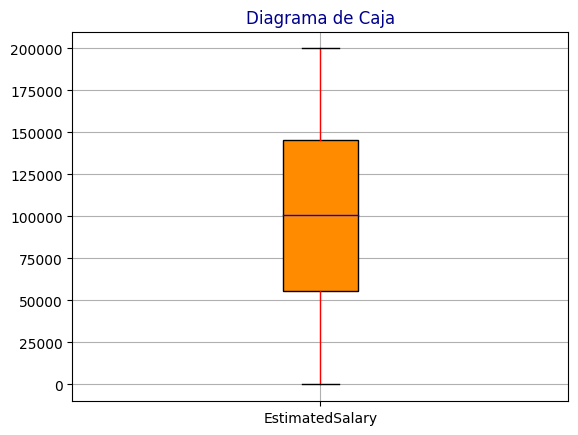

In [51]:
##### EstimatedSalary #####
import matplotlib.pyplot as plt

# Creando el diagrama de caja con estilos 
estados_sin_nulos[['EstimatedSalary']].boxplot( 
            patch_artist=True, 
            boxprops={'facecolor': 'darkorange', 'linewidth': 1}, 
            whiskerprops={'color': 'red'},
            medianprops={'color': 'blue'})

# Configurando el título y etiquetas de los ejes
plt.title("Diagrama de Caja", color='darkblue')
# Mostrando el diagrama de caja
plt.show()

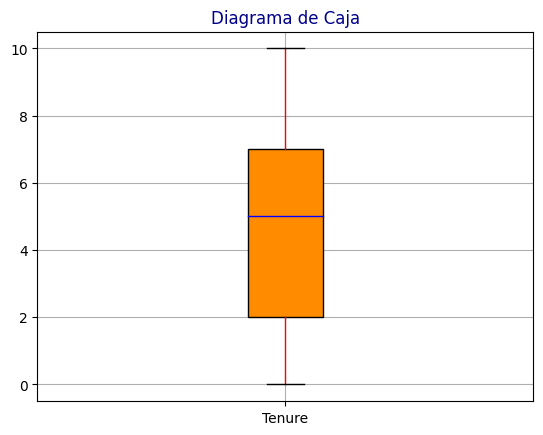

In [52]:
##### Tenure #####
import matplotlib.pyplot as plt

# Creando el diagrama de caja con estilos 
estados_sin_nulos[['Tenure']].boxplot( 
            patch_artist=True, 
            boxprops={'facecolor': 'darkorange', 'linewidth': 1}, 
            whiskerprops={'color': 'red'},
            medianprops={'color': 'blue'})

# Configurando el título y etiquetas de los ejes
plt.title("Diagrama de Caja", color='darkblue')
# Mostrando el diagrama de caja
plt.show()

#### **Outliers en:**
- NumOfProducts
- Age

In [54]:
estados_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9755 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       9755 non-null   int64   
 1   Gender           9755 non-null   category
 2   Balance          9755 non-null   float64 
 3   NumOfProducts    9755 non-null   int64   
 4   HasCrCard        9755 non-null   category
 5   IsActiveMember   9755 non-null   category
 6   Age              9755 non-null   float64 
 7   Geography        9755 non-null   category
 8   EstimatedSalary  9755 non-null   float64 
 9   Exited           9755 non-null   category
 10  Tenure           9755 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 581.7 KB


In [60]:
estados_sin_nulos

,CustomerId,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure
0,15634602,0,0.00,1,1,1,42.0,3,101348.88,1,2
1,15647311,0,83807.86,1,0,1,41.0,2,112542.58,0,1
2,15619304,0,159660.80,3,1,0,42.0,3,113931.57,1,8
3,15701354,0,0.00,2,0,0,39.0,3,93826.63,0,1
4,15737888,0,125510.82,1,1,1,43.0,2,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1,0.00,2,1,0,39.0,3,96270.64,0,5
9996,15569892,1,57369.61,1,1,1,35.0,3,101699.77,0,10
9997,15584532,0,0.00,1,0,1,37.0,3,42085.58,1,7
9998,15682355,1,75075.31,2,1,0,42.0,1,92888.52,1,3


#### **Trabajando con NumOfProducts**

In [62]:
consulta_max = (estados_sin_nulos.NumOfProducts > 3).value_counts()
consulta_max

NumOfProducts
False    9699
True       56
Name: count, dtype: int64

#### **Decidimos dejar los outliers de NumOfProducts tal como están, por ser solo 56 valores, con respecto a los otros 9699 de datos restantes.**

#### **Trabajando los outliers de la variable Age**

In [63]:
cant_outliers_age = (estados_sin_nulos.Age > 60).value_counts()
cant_outliers_age

Age
False    9333
True      422
Name: count, dtype: int64

#### **Notamos que hay 422 outliers de 9333 en Age**
Hay 422 personas mayores a 60 años, de los 9333 restantes. Consideramos que es un dato importante y no deberíamos modificarlo aún siendo outliers, porque las personas más mayores son las que menos se cambian de banco por costumbre, tradición, etc, y por lo tanto queremos mantener esta cantidad intacta.

In [64]:
estados_sin_nulos

,CustomerId,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure
0,15634602,0,0.00,1,1,1,42.0,3,101348.88,1,2
1,15647311,0,83807.86,1,0,1,41.0,2,112542.58,0,1
2,15619304,0,159660.80,3,1,0,42.0,3,113931.57,1,8
3,15701354,0,0.00,2,0,0,39.0,3,93826.63,0,1
4,15737888,0,125510.82,1,1,1,43.0,2,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1,0.00,2,1,0,39.0,3,96270.64,0,5
9996,15569892,1,57369.61,1,1,1,35.0,3,101699.77,0,10
9997,15584532,0,0.00,1,0,1,37.0,3,42085.58,1,7
9998,15682355,1,75075.31,2,1,0,42.0,1,92888.52,1,3


In [65]:
estados_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9755 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       9755 non-null   int64   
 1   Gender           9755 non-null   category
 2   Balance          9755 non-null   float64 
 3   NumOfProducts    9755 non-null   int64   
 4   HasCrCard        9755 non-null   category
 5   IsActiveMember   9755 non-null   category
 6   Age              9755 non-null   float64 
 7   Geography        9755 non-null   category
 8   EstimatedSalary  9755 non-null   float64 
 9   Exited           9755 non-null   category
 10  Tenure           9755 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 581.7 KB


### `Volviendo al Ejercicio 1`
#### a. ¿Consideráis que todas las variables del conjunto de datos son útiles de cara a la predicción? ¿Cuáles sí y cuáles no? Justificad vuestra respuesta.
#### b. ¿A qué tipo de modelo os enfrentáis? Justificad vuestra respuesta

#### a. No, no todas las variables son útiles: 
- CustomerId: No consideramos que sea importante el número de clientes en la predicción, porque la gente no se va ni permanece en el banco por su CustomerId.
- CreditScore: Es una puntuación del banco sobre el cliente, que es interna y no afecta la decisión del cliente sobre quedarse o irse. De hecho, la mayoría de los clientes no deberían saber su CreditScore. POR ESE MOTIVO, LA HEMOS ELIMINADO
- EstimatedSalary: Es una puntuación interna del banco, no debería influir en si el cliente se va o no, ya que no es un dato que conoce.
- Las variables Unnamed y RowNumber no aportan valor, ya que perfectamente pueden ser reemplazadas por el índice. POR ESE MOTIVO, LAS HEMOS ELIMINADO.
- Surname: no nos interesa porque podemos utilizar CustomerId para identificar a cada cliente. POR ESE MOTIVO, LAS HEMOS ELIMINADO.
- Gender: Porque hay normas en la mayor parte de los países del mundo que prohíben la discriminación por género en los servicios financieros. Además, en el pasado había grandes diferencias de actuar en el aspecto financiero entre hombres y mujeres, pero hoy en día esa situación se ha homogeneizado bastante. Dicho esto, se comprueba que hay 5457 hombres y 4298 mujeres en el banco.

#### Por otro lado, el resto de las variables si las consideramos de importancia para nuestro modelo, ya que no podemos descartarlas como las anteriores, y puede que existan relaciones financieras. Por lo tanto, exponemos las razones particulares de cada una:
- Balance: Es más dificil que un usuario con mucho dinero se mude de banco más fácilmente.
- NumOfProducts: Es más dificil que un usuario con muchos productos se mude de banco, porque a más productos contratados, creemos que más cómodo/a se siente en el banco.
- HasCrCart: Un cliente con tarjeta de crédito, está más involucrado con el banco. El uso de la tarjeta implica que mantiene una relación financiera con la entidad bancaria, que de alguna manera lo une hasta que ya no tenga ninguna deuda. Si el usuario mantiene su tarjeta activa, es probable que la esté usando bastante y por lo tanto su relación con el banco se mantenga.
- IsActiveMember: el cliente activo utiliza los productos, servicios adicionales, tiene crédito, etc. Esto indica que mantiene una relación estable y constante con el banco por lo que es un buen indicio para saber si va a permanecer o no.
- Age: La edad del cliente puede ser un factor importante teniendo en cuenta que las personas mayores tienden a estabilizarse y generar menos cambios en sus vidas, por lo que si están en el banco y son mayores, es probable que no lo cambien.
- Geography: la consideramos importante porque la necesitamos para la predicción del modelo según los estados de las personas.
- Exited: Si porque es nuestra target.
- Tenure: Es importante la antigüedad de un cliente. A más años permanezca en el banco, más dificil es que se vaya.

#### b. Es un modelo de regresión logística, ya que nuestra variable "Exited" es la target y es una variable dicotómica, donde el cliente permanece en el banco si tiene valor 0, y 1 si se irá.

### **`Arrancamos con el ejercicio 2`**

In [58]:
# - Exited (Category) --> TARGET!
# - Balance (float), NumOfProducts (int), Age (float), Tenure (int)
# - IsActiveMember (category), Geography (category), HasCrCard (category)

### **`Ejercicio 2`**

#### Atendiendo a la segunda respuesta del ejercicio anterior, plantead, al menos, 2 algoritmos diferentes que predigan el abandono (o no) del cliente. Realizad todos los pasos necesarios antes de la aplicación del modelo predictivo.

• ¿Qué algoritmo es el que os ha arrojado mejores resultados?

• ¿Cómo habéis evaluado la bondad del ajuste? Justificad vuestra 
respuesta.

• ¿Podéis explicar al cliente qué características son las que más inciden 
en la decisión de un cliente para abandonar definitivamente la entidad?

### **Creamos una copia con las variables selectas**
#### Estas son las variables que creemos de importancia para el modelo, y que vamos a probar

In [71]:
##### Bandera:
selectas = estados_sin_nulos[["Geography","Age","Tenure","Balance","NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"]]

# Para poder incluir las variables categóricas, incluida la target, en una correlación de 
# Pearson, las transformo todas en tipo int:
cambiadas_num = selectas.copy()

cambiadas_num[['IsActiveMember', 'Geography', 'HasCrCard']] = cambiadas_num[['IsActiveMember', 'Geography', 'HasCrCard']].astype(int)
cambiadas_num['Exited'] = cambiadas_num ['Exited'].astype(int)

cambiadas_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9755 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Geography       9755 non-null   int32  
 1   Age             9755 non-null   float64
 2   Tenure          9755 non-null   int64  
 3   Balance         9755 non-null   float64
 4   NumOfProducts   9755 non-null   int64  
 5   HasCrCard       9755 non-null   int32  
 6   IsActiveMember  9755 non-null   int32  
 7   Exited          9755 non-null   int32  
dtypes: float64(2), int32(4), int64(2)
memory usage: 533.5 KB


#### `Correlación de Pearson`

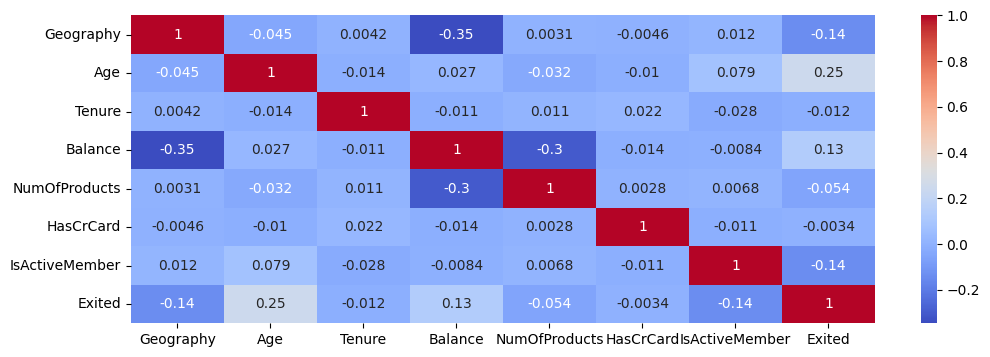

In [67]:
#Correlación de Pearson
import seaborn as sns

plt.figure(figsize = (12,4))
sns.heatmap(cambiadas_num.corr(), annot=True, cmap= 'coolwarm')
plt.show()

### `Conclusión:`
##### Las que más se acercan a 1 son Age, Geography, IsActiveMember y Balance.
##### Viendo la correlación de Pearson, en primera instancia nos quedaríamos con Age, Geography, IsActiveMember y Balance, ya que son las que más cerca están de tener una correlación lineal positiva.

### `Aplicamos diagramas de caja para ver las relaciones entre las variables`
### INTERPRETACION "GRAFICAS BIVARIANTES": 
#### Viendo las gráficas, también se puede apreciar que la variable más significativa para entrar en el modelo es Age, y Balance.


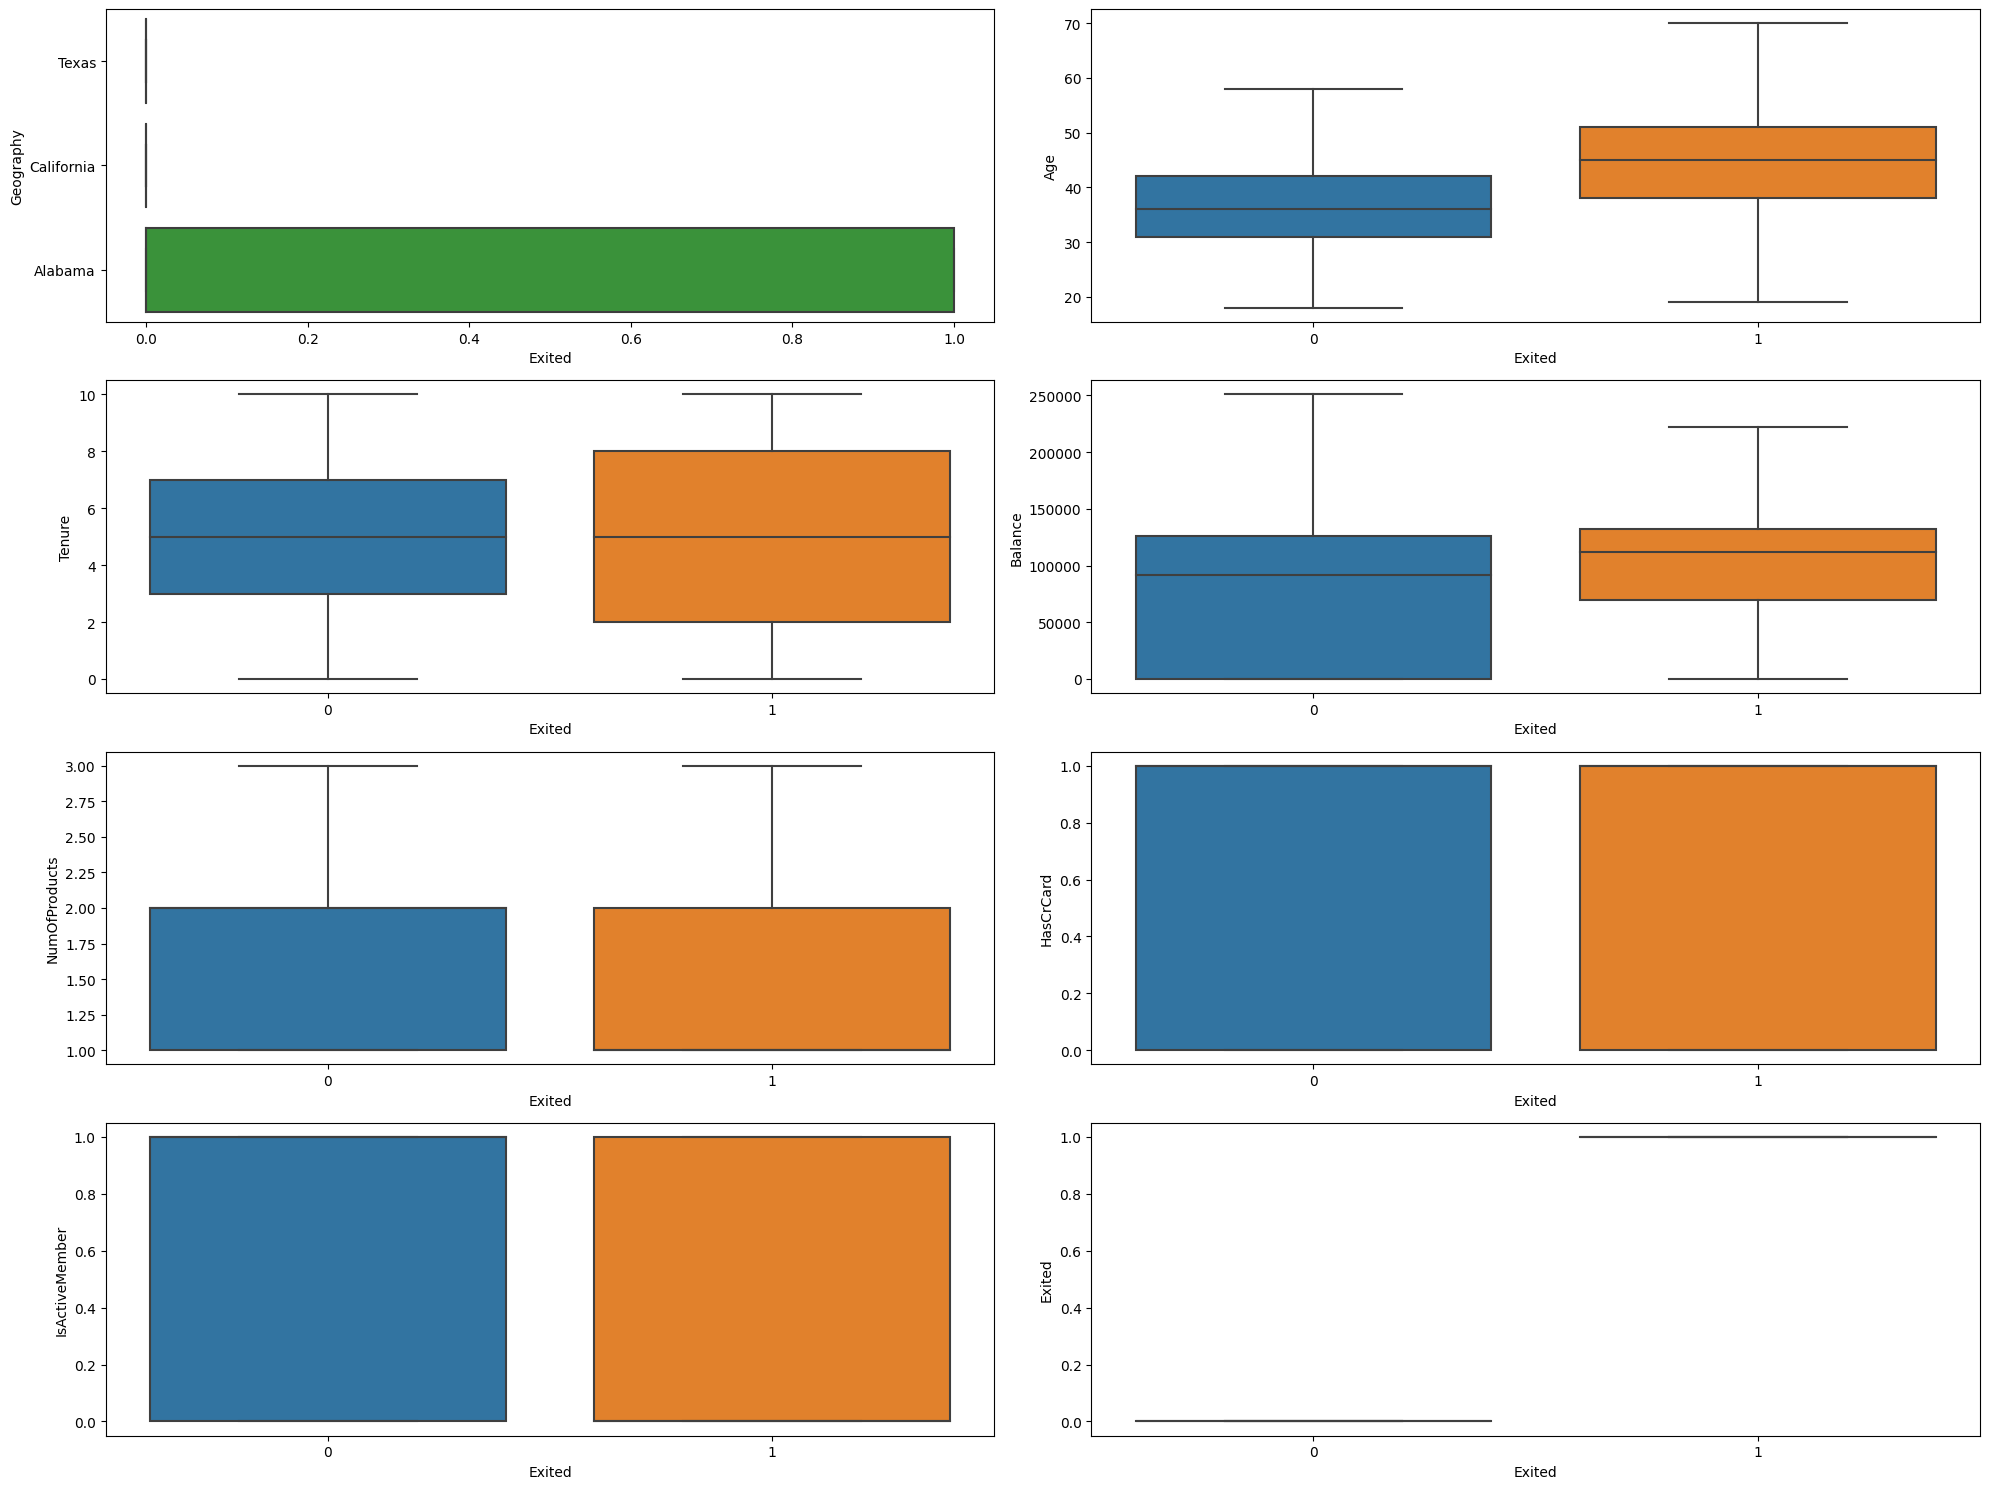

In [68]:
# No obstante, voy a seguir haciendo pruebas y voy a compararlas en un 
# gráfico de cajas:
datos_features = selectas
fig = plt.figure(figsize=(20,15))

# Calcular el número de filas y columnas necesarias según la cantidad de subplots
num_subplots = len(datos_features.columns)
rows = (num_subplots // 2) + (num_subplots % 2)
cols = 2

for i, column in enumerate(datos_features.columns):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.boxplot(x=df['Exited'], y=df[column], showfliers=False)
    plt.xlabel('Exited')

plt.tight_layout()  # Ajustar el espacio entre subplots
plt.show()



### **`VIF`**

In [69]:
# Vamos a utilizar un VIF, para intentar confirmar lo que estamos diciendo:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Indicamos el conjunto de variables linealmente independientes
X = selectas
  
# Generamos el dataframe VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# Calculamos el valor VIF de cada variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature        VIF
0       Geography   6.769898
1             Age  11.625893
2          Tenure   3.763960
3         Balance   2.452685
4   NumOfProducts   6.439925
5       HasCrCard   3.212737
6  IsActiveMember   2.113854
7          Exited   1.350823


### **`MÉTODO 'VARIANCE THRESHOLD`**

In [75]:
##### El resultado del VIF contradice todo lo que habíamos especulado hasta ahora, 
##### por lo que vamos a usar el METODO 'VARIANCE THRESHOLD', a ver si nos arroja solución al problema:
    
from sklearn.feature_selection import VarianceThreshold

var_th = VarianceThreshold(threshold = 1.5)
numericas = selectas
selected_vars = var_th.fit_transform(numericas)

print('Listado de variables seleccionadas', var_th.get_feature_names_out())

Listado de variables seleccionadas ['Age' 'Tenure' 'Balance']


#### Según el METODO 'VARIANCE THRESHOLD', nuestras variables más relevantse son: 
- En primer lugar Balance
- En segundo lugar Age 
- En tercer lugar Tenure

### `Reescalado de variables que vamos a utilizar en nuestro modelo`
#### Utilizamos el método RobustScaler

In [76]:
from sklearn.preprocessing import RobustScaler

reescaladas = selectas[['Balance', 'Age', 'NumOfProducts']].copy()

robusto = RobustScaler().fit(reescaladas)

robust = robusto.transform(reescaladas)

reescaladas.loc[:, 'Balance_ROB'] = robust[:, 0]

reescaladas.loc[:, 'Age_ROB'] = robust[:, 1]

reescaladas.loc[:, 'NumOfProducts_ROB'] = robust[:, 1]

reescaladas

,Balance,Age,NumOfProducts,Balance_ROB,Age_ROB,NumOfProducts_ROB
0,0.00,42.0,1,-0.761680,0.454545,0.454545
1,83807.86,41.0,1,-0.105525,0.363636,0.363636
2,159660.80,42.0,3,0.488348,0.454545,0.454545
3,0.00,39.0,2,-0.761680,0.181818,0.181818
4,125510.82,43.0,1,0.220979,0.545455,0.545455
...,...,...,...,...,...,...
9995,0.00,39.0,2,-0.761680,0.181818,0.181818
9996,57369.61,35.0,1,-0.312518,-0.181818,-0.181818
9997,0.00,37.0,1,-0.761680,0.000000,0.000000
9998,75075.31,42.0,2,-0.173895,0.454545,0.454545


#### VOLVEMOS el METODO 'VARIANCE THRESHOLD', PERO AHORA CON LAS VARIABLES REESCALADAS

In [82]:
var_th = VarianceThreshold(threshold = 1.5)
selected_vars = var_th.fit_transform(reescaladas)

print('Listado de variables seleccionadas', var_th.get_feature_names_out())

Listado de variables seleccionadas ['Balance' 'Age']


### `MODELO DE REGRESIÓN LOGÍSTICA CON LA TÉCNICA K-FOLDS CROSS VALIDATION`

In [83]:
# target: exited
# 0: el cliente no abandona la entidad
# 1: el cliente abandona la entidad

# MODELO DE REGRESIÓN LOGÍSTICA CON LA TÉCNICA K-FOLDS CROSS VALIDATION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

x = reescaladas [['Balance_ROB', 'Age_ROB']]
y = selectas ['Exited']

kfold = KFold(n_splits=5)
model = LogisticRegression()

result = cross_val_score(model, x, y, cv=kfold)

result

print(f"El SCORE del modelo es: {round (result.mean(),2)}")

El SCORE del modelo es: 0.82


In [86]:
# target: exited
# 0: el cliente no abandona la entidad
# 1: el cliente abandona la entidad

# MODELO DE REGRESIÓN LOGÍSTICA CON LA TÉCNICA K-FOLDS CROSS VALIDATION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

x = reescaladas [['Balance_ROB', 'Age_ROB']]
y = selectas ['Exited']

kfold = KFold(n_splits=5)
model = LogisticRegression(class_weight = {0: 1, 1: 5})

result = cross_val_score(model, x, y, cv=kfold)

result

print(f"El SCORE del modelo es: {round (result.mean(),2)}")

El SCORE del modelo es: 0.68


### `Mismo modelo pero evaluando las métricas`

In [87]:
# Mismo modelo pero aplicando métricas, para ver la puntuación:
# 1.- Métrica ACCURACY:

#Entrenamos y testeamos:
model = LogisticRegression()
metrica = "accuracy"
result = cross_val_score(model, x, y, cv=kfold, scoring=metrica)

print(f"El cross val score obtenido para cada repetición con la métrica accuracy es: {result}")
print(f"La media del cross val score con la métrica accuracy es {round (result.mean(),4)*100}%")
print ("\n")

# 2.- Métrica PRECISION:

#Entrenamos y testeamos:
model = LogisticRegression()
metrica2 = "precision"
results2 = cross_val_score(model, x, y, cv=kfold, scoring=metrica2)

print(f"El cross val score obtenido para cada repetición con la métrica precision es: {results2}")
print(f"La media del cross val score con la métrica precision es {round (results2.mean(),4)*100}%")
print ("\n")

# 3.- Métrica RECALL:

model = LogisticRegression()
metrica3 = "recall"
results3 = cross_val_score(model, x, y, cv=kfold, scoring=metrica3)

print(f"El cross val score obtenido para cada repetición con la métrica recall es: {results3}")
print(f"La media del cross val score con la métrica recall es {round (results3.mean(),4)*100}%")
print ("\n")

# 4.- Métrica F1 - SCORE:

#Entrenamos y testeamos:
model = LogisticRegression()
metrica4 = "f1"
results4 = cross_val_score(model, x, y, cv=kfold, scoring=metrica4)

print(f"El cross val score obtenido para cada repetición con la métrica F1 – Score es: {results4}")
print(f"La media del cross val score con la métrica F1 – Score es {round (results4.mean(),4)*100}%")
print ("\n")

# 5.- Métrica AREA UNDER ROC CURVE:

#Entrenamos y testeamos:
model = LogisticRegression()
metrica5 = "roc_auc"
results5 = cross_val_score(model, x, y, cv=kfold, scoring=metrica5)

print(f"El cross val score obtenido para cada repetición con la métrica roc_auc es: {results5}")
print(f"La media del cross val score con la métrica roc_auc es {round (results5.mean(),4)*100}%")

El cross val score obtenido para cada repetición con la métrica accuracy es: [0.81804203 0.7990774  0.8293183  0.82675551 0.82470528]
La media del cross val score con la métrica accuracy es 81.96%


El cross val score obtenido para cada repetición con la métrica precision es: [0.12121212 0.2        0.25       0.2195122  0.23255814]
La media del cross val score con la métrica precision es 20.47%


El cross val score obtenido para cada repetición con la métrica recall es: [0.01212121 0.02465753 0.03194888 0.02857143 0.03134796]
La media del cross val score con la métrica recall es 2.5700000000000003%


El cross val score obtenido para cada repetición con la métrica F1 – Score es: [0.02203857 0.04390244 0.05665722 0.0505618  0.05524862]
La media del cross val score con la métrica F1 – Score es 4.569999999999999%


El cross val score obtenido para cada repetición con la métrica roc_auc es: [0.72483316 0.71820294 0.73618767 0.73876955 0.71236612]
La media del cross val score con la métrica 

### Los resultados no son buenos, por lo que vamos a utilizar otro módelo

### `MODELO DE REGRESIÓN LOGÍSTICA CON LA TECNICA TRAIN-TEST VALIDATION`

In [88]:
# MODELO DE REGRESIÓN LOGÍSTICA CON LA TECNICA TRAIN-TEST VALIDATION

from sklearn.model_selection import train_test_split
x1 = reescaladas [['Balance_ROB', 'Age_ROB']]
y1 = selectas ['Exited']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.25)

modelo_ajusta_train = LogisticRegression().fit(x1_train, y1_train)

#Ordenada en el origen:
print(f"INTERCEPTO: {modelo_ajusta_train.intercept_.round(2)}")
#Estimación del coeficiente:
print(f"PENDIENTE: {modelo_ajusta_train.coef_.round(2)}")

# Nuestra REGRESION LOGISTICA QUEDA CALCULADA COMO: logit(P) = -2.55 + 0.99 * X ( Horas de Estudio )
# SCORE aplica el modelo ajustado en TRAIN en la parte de TEST y devuelve el coeficiente de determinación del modelo de regresión.
# Esto es, la varianza explicada por lo predicho frente a la variable real, a mayor valor, mejor.
result2 = modelo_ajusta_train.score(x1_test, y1_test)
print(f"El SCORE del modelo es: {round (result2.mean(),2)}")

INTERCEPTO: [-1.72]
PENDIENTE: [[0.84 0.63]]
El SCORE del modelo es: 0.82


### `Mismo modelo pero evaluando las métricas`

In [89]:
# Voy a utilizar el mismo modelo, pero aplicando métricas, para ver que puntuación me da:
from sklearn.metrics import accuracy_score

# 1.- Métrica ACCURACY:
# Entrenamiento del modelo
model.fit(x1_train, y1_train)

# Predicciones en el conjunto de prueba
y1_pred = model.predict(x1_test)

# Cálculo de la precisión
accuracy = accuracy_score(y1_test, y1_pred)

print(f"El cross val score obtenido con la métrica accuracy es: {round (accuracy,2)}")

# 2.- Métrica PRECISION:
from sklearn.metrics import precision_score

# Entrenamiento del modelo
model.fit(x1_train, y1_train)

# Predicciones en el conjunto de prueba
y1_pred = model.predict(x1_test)

# Cálculo de la precisión
precision = precision_score(y1_test, y1_pred)
print(f"El cross val score obtenido con la métrica precision es: {round(precision,2)}")

# 3.- Métrica RECALL:
from sklearn.metrics import recall_score

# Entrenamiento del modelo
model.fit(x1_train, y1_train)

# Predicciones en el conjunto de prueba
y1_pred = model.predict(x1_test)

# Cálculo del recall

recall = recall_score(y1_test, y1_pred)

print(f"El cross val score obtenido con la métrica recall es: {recall:.2f}")

# 4.- Métrica F1 - SCORE:

from sklearn.metrics import f1_score

# Entrenamiento del modelo

model.fit(x1_train, y1_train)

# Predicciones en el conjunto de prueba
y1_pred = model.predict(x1_test)

# Cálculo del F1-Score
f1 = f1_score(y1_test, y1_pred)

print(f"El cross val score obtenido con la métrica F1 – Score es: {round(f1,2)}")

# 5.- Métrica AREA UNDER ROC CURVE:
from sklearn.metrics import roc_auc_score

# Entrenamiento del modelo
model.fit(x1_train, y1_train)

# Probabilidades de clase positiva en el conjunto de prueba
y1_pred_proba = model.predict_proba(x1_test)[:, 1]

# Cálculo del área bajo la curva ROC
auc = roc_auc_score(y1_test, y1_pred_proba)

print(f"El cross val score obtenido con la métrica roc_auc es: {round(auc,2)}")

El cross val score obtenido con la métrica accuracy es: 0.82
El cross val score obtenido con la métrica precision es: 0.15
El cross val score obtenido con la métrica recall es: 0.02
El cross val score obtenido con la métrica F1 – Score es: 0.03
El cross val score obtenido con la métrica roc_auc es: 0.73


### Viendo las métricas de los modelos, podemos concluir que los modelos no son buenos.
### Por lo que vamos a investigar este asunto.

In [90]:
# MATRIZ DE CONFUSIÓN:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Divido los datos en train y test:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#Entrenamos y testeamos
model = LogisticRegression()
model.fit(x_train,y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)

print(matrix)
# Interpretación de la matriz:
# TN  FP  |  2633  42
# FN  TP  |   533  12

[[2633   42]
 [ 533   12]]


### Conclusiones:

- True Negatives (TN): Cantidad de veces que el modelo predijo correctamente que el cliente no se iría y efectivamente no se fue. En este caso 2633.

- False Positives (FP): Cantidad de veces que el modelo predijo incorrectamente que el cliente se iría cuando en realidad no se fue. En este caso 42.

- False Negatives (FN): Cantidad de veces que el modelo predijo incorrectamente que el cliente se quedaría cuando en realidad se fue. En este caso 533.

- True Positives (TP): Cantidad de veces que el modelo predijo correctamente que el cliente se iría y efectivamente se fue. En este caso 12.

#### En resumen, como podemos apreciar, el modelo no es eficiente, por lo que sospechamos que podemos estar ante un desbalanceo de datos, por lo que nos proponemos comprobarlo. 

### `Comprobación del desbalanceo en nuestra target`

In [91]:
df.groupby(by="Exited").count()

,Unnamed: 0,RowNumber,CustomerId,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Surname,Tenure
Exited,,,,,,,,,,,,,,
0,8297,8297,8297,8297,8297,8297,8297,8297,8297,7778,8297,7637,8054,8297
1,1703,1703,1703,1703,1703,1703,1703,1703,1703,1582,1703,1571,1652,1703


#### Los métodos existentes para solucionar el desbalanceo de datos, corrompen los mismos por lo que no los consideramos efectivos.
#### En su lugar, vamos a utilizar un recurso que utilizan los analistas de datos en la vida real para tratar este problema, que consiste en bajar el punto de corte. 

In [93]:
import numpy as np

# Con LOC extraemos los valores para el 'Target' CLASS
target = selectas.loc[:, ['Exited']]

prueba = reescaladas [['Balance_ROB', 'Age_ROB']].copy()

x4 = np.array(prueba)
y4 = np.array(target).ravel() # LA SOLUCION al WARNING que daba con las dimensiones

# Ahora ajustamos y entrenamos nuestro modelo con un 80%-20%
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.2)
modelo = LogisticRegression().fit(x4_train, y4_train)

# Lo calculamos
print(f'Valor INTERCEPT: {modelo.intercept_.round(2)}') # Ordenada en el Origen
print(f'Valores SLOPE: {modelo.coef_.round(2)}') # Estimación del Coeficiente

# *** RECORDEMOS QUE: LOGIT(P) = INTERCEPT + ( SLOPE * TARGET ) ***
# Hagamos las predicciones

prediccion = modelo.predict(x4_test)
print('Punto Corte 0.5 - PREDICCION:', prediccion) # Valor por defecto ( < 0.5 --> 0  &  > 0.5 --> 1 )

# Establecemos el nuevo PUNTO DE CORTE A 0'25
threshold = 0.25
pred = (modelo.predict(x4_test) > threshold).astype('int')
print("Punto de corte 0.25", pred) # SOLUCION al otro problema de dimensionalidad

# ************************************************************************************************
# *** Y recalculamos la precisión respecto al nuevo valor del punto de corte
# ************************************************************************************************

from sklearn.metrics import precision_score

# 1.- Métrica ACCURACY:
# Entrenamiento del modelo
model.fit(x1_train, y1_train)

# Predicciones en el conjunto de prueba
y1_pred = model.predict(x1_test)

# Cálculo de la precisión
accuracy = accuracy_score(y1_test, y1_pred)
print(f"El cross val score obtenido con la métrica accuracy es: {round (accuracy,2)}")

# 2.- Métrica PRECISION:
from sklearn.metrics import precision_score
# Entrenamiento del modelo
model.fit(x4_train, y4_train)

# Predicciones en el conjunto de prueba
y4_pred = model.predict(x4_test)

# Cálculo de la precisión
precision_modelo = precision_score(y4_test, y4_pred, average='binary').round(2)
print(f"El cross val score obtenido con la métrica precision es: {precision_modelo}")

# 3.- Métrica RECALL:
from sklearn.metrics import recall_score
# Entrenamiento del modelo
model.fit(x4_train, y4_train)
# Predicciones en el conjunto de prueba
y4_pred = model.predict(x4_test)
# Cálculo del recall
recall = recall_score(y4_test, y4_pred)
print(f"El cross val score obtenido con la métrica recall es: {recall}")

# 4.- Métrica F1 - SCORE:
from sklearn.metrics import f1_score
# Entrenamiento del modelo
model.fit(x4_train, y4_train)
# Predicciones en el conjunto de prueba
y4_pred = model.predict(x4_test)
# Cálculo del F1-Score
f1 = f1_score(y4_test, y4_pred)

print(f"El cross val score obtenido con la métrica F1 – Score es: {round(f1,2)}")

# 5.- Métrica AREA UNDER ROC CURVE:
from sklearn.metrics import roc_auc_score

# Entrenamiento del modelo
model.fit(x4_train, y4_train)

# Probabilidades de clase positiva en el conjunto de prueba
y4_pred_proba = model.predict_proba(x4_test)[:, 1]

# Cálculo del área bajo la curva ROC
auc = roc_auc_score(y4_test, y4_pred_proba)

print(f"El cross val score obtenido con la métrica roc_auc es: {round(auc,2)}")

Valor INTERCEPT: [-1.75]
Valores SLOPE: [[0.79 0.66]]
Punto Corte 0.5 - PREDICCION: [0 0 0 ... 0 0 1]
Punto de corte 0.25 [0 0 0 ... 0 0 1]
El cross val score obtenido con la métrica accuracy es: 0.82
El cross val score obtenido con la métrica precision es: 0.19
El cross val score obtenido con la métrica recall es: 0.02932551319648094
El cross val score obtenido con la métrica F1 – Score es: 0.05
El cross val score obtenido con la métrica roc_auc es: 0.72


### `Conclusión:`
#### Como no obtenemos buenas métricas, vamos a utilizar un modelo de clasificación como el RandomForest que creemos puede ajustarse mejor a este caso.

### `Usando las variables reescaladas`

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Paso 1: Preparación de los datos
features = reescaladas
target = 'Exited'  

X = reescaladas
y = estados_sin_nulos[target]

# Paso 2: División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Entrenamiento y evaluación de Random Forest
rf = RandomForestClassifier(n_estimators = 10, max_depth=15)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Calcular métricas de evaluación
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("Confusion Matrix:")
print(rf_confusion_matrix)

Random Forest:
Accuracy: 0.8185545873910814
Precision: 0.43
Recall: 0.26380368098159507
F1-score: 0.32699619771863114
Confusion Matrix:
[[1511  114]
 [ 240   86]]


### `Con los datos sin reescalar`
#### El Random Forest no lo necesita, aunque a veces puede ser útil. En este caso, no lo es porque empeora nuestras métricas.

### `Con las métricas más altas`

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Paso 1: Preparación de los datos
features = ['Age', 'Balance', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure', 'EstimatedSalary']
target = 'Exited'  

X = estados_sin_nulos[features]
y = estados_sin_nulos[target]

# Paso 2: División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Entrenamiento y evaluación de Random Forest
rf = RandomForestClassifier(n_estimators = 50, max_depth=15)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Calcular métricas de evaluación
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

print("Random Forest:")
print("Accuracy:", round(rf_accuracy * 100, 2), '%')
print("Precision:", round(rf_precision * 100, 2), '%')
print("Recall:", round(rf_recall * 100, 2), '%')
print("F1-score:", round(rf_f1 * 100, 2), '%')
print("Confusion Matrix:")
print(rf_confusion_matrix)

Random Forest:
Accuracy: 85.85 %
Precision: 65.06 %
Recall: 33.13 %
F1-score: 43.9 %
Confusion Matrix:
[[1567   58]
 [ 218  108]]


### `Conclusión`
#### RandomForest terminó siendo el más preciso de todos.

- True Negatives (TN): Cantidad de veces que el modelo predijo correctamente que el cliente no se iría y efectivamente no se fue. En este caso 1567.

- False Positives (FP): Cantidad de veces que el modelo predijo incorrectamente que el cliente se iría cuando en realidad no se fue. En este caso 58.

- False Negatives (FN): Cantidad de veces que el modelo predijo incorrectamente que el cliente se quedaría cuando en realidad se fue. En este caso 218.

- True Positives (TP): Cantidad de veces que el modelo predijo correctamente que el cliente se iría y efectivamente se fue. En este caso 108.

#### En resumen, como podemos apreciar, el modelo ha mejorado bastante en cuanto a las otras métricas, ya que hemos mejorado la precision, el recall y por consiguiente el F1-score

### Respondiendo al Ejercicio 2

#### • ¿Qué algoritmo es el que os ha arrojado mejores resultados?
#### Usamos K-fold Cross Validation y Train-Test Validation, siendo de las dos la que mejor resultado arroja el método k-folds, aunque ninguno arrojó métricas aceptables. Por esta razón, decidimos usar el modelo de entrenamiento no supervisado Random Forest, que con un ajuste de parámetros mejoró mucho las métricas.

#### • ¿Cómo habéis evaluado la bondad del ajuste? Justificad vuestra respuesta.
#### En principio con los métodos utilizados no fueron buenos, pero al utilizar Random Forest logramos mejorar de una forma aceptable las métricas para los datos que tenemos. Consideramos en este caso, que el ajuste es aceptable para nuestros datos actuales, teniendo en cuenta que la precision no es una buena métrica cuando nuestros datos están muy desbalanceados, y que en general todas las métricas subieron.

#### • ¿Podéis explicar al cliente qué características son las que más inciden en la decisión de un cliente para abandonar definitivamente la entidad?
#### En este momento con este modelo, podemos decir que Balance y Age son variables de peso para saber si un cliente abandona o no la entidad.

___________________
### `Ejercicio 3`
#### Escogiendo el mejor algoritmo del ejercicio anterior, planteaos la posibilidad de que los resultados puedan ser más ajustados si utilizáis un modelo diferente por cada estado en que la entidad opera

#### • ¿Tenéis algún problema de desbalanceo de datos? Si es así, solucionadlo.
#### • ¿Obtenéis mejores resultados planteando modelos diferenciados por estado?
__________________

### `Viendo el desbalanceo de datos`

In [98]:
state_counts = estados_sin_nulos['Geography'].value_counts()

for state in state_counts.index:
    state_data = estados_sin_nulos[estados_sin_nulos['Geography'] == state]
    class_counts = state_data['Exited'].value_counts()
    print(f"Estado: {state}")
    print(class_counts)

Estado: 3
Exited
0    4125
1     776
Name: count, dtype: int64
Estado: 1
Exited
0    1644
1     788
Name: count, dtype: int64
Estado: 2
Exited
0    2344
1      78
Name: count, dtype: int64


#### `Viendo el desbalanceo de datos individualmente por estado`

#### En Alabama

In [101]:
selectas_Alabama = selectas.groupby(by="Exited").count()
selectas_Alabama

,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
Exited,,,,,,,
0,8113,8113,8113,8113,8113,8113,8113
1,1642,1642,1642,1642,1642,1642,1642


#### En California

In [103]:
selectas_California = selectas.groupby(by="Exited").count()
selectas_California

,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
Exited,,,,,,,
0,8113,8113,8113,8113,8113,8113,8113
1,1642,1642,1642,1642,1642,1642,1642


#### En Texas

In [104]:
selectas_Texas = selectas.groupby(by="Exited").count()
selectas_Texas

,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
Exited,,,,,,,
0,8113,8113,8113,8113,8113,8113,8113
1,1642,1642,1642,1642,1642,1642,1642


### Notamos que hay un desbalanceo de datos en todos los estados: Alabama, California y Texas
#### Por esta razón dividimos el dataframe en tres, uno por cada estado.

In [105]:
selectas_Alabama = selectas.groupby('Geography').get_group(1)
selectas_Alabama

,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
7,1,29.0,4,115046.74,4,1,0,1
15,1,45.0,3,143129.41,2,0,1,0
16,1,37.0,1,132602.88,1,1,0,1
26,1,36.0,2,136815.64,1,1,1,0
28,1,43.0,3,141349.43,1,1,1,0
...,...,...,...,...,...,...,...,...
9982,1,46.0,7,137145.12,1,1,0,1
9984,1,35.0,7,90602.42,2,1,1,0
9986,1,47.0,1,183579.54,2,0,1,0
9990,1,33.0,3,35016.60,1,1,0,0


In [106]:
selectas_California = selectas.groupby('Geography').get_group(2)
selectas_California

,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
1,2,41.0,1,83807.86,1,0,1,0
4,2,43.0,2,125510.82,1,1,1,0
5,2,44.0,8,113755.78,2,1,0,0
11,2,24.0,3,0.00,2,1,0,0
14,2,35.0,7,0.00,2,1,1,0
...,...,...,...,...,...,...,...,...
9966,2,35.0,4,125920.98,1,1,1,0
9980,2,37.0,6,74371.49,1,0,0,0
9987,2,30.0,8,180307.73,2,1,1,0
9989,2,37.0,4,0.00,2,1,1,0


In [107]:
selectas_Texas = selectas.groupby('Geography').get_group(3)
selectas_Texas

,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,3,42.0,2,0.00,1,1,1,1
2,3,42.0,8,159660.80,3,1,0,1
3,3,39.0,1,0.00,2,0,0,0
6,3,50.0,7,0.00,2,1,1,0
8,3,37.0,4,142051.07,2,0,1,0
...,...,...,...,...,...,...,...,...
9994,3,29.0,2,0.00,2,0,0,0
9995,3,39.0,5,0.00,2,1,0,0
9996,3,35.0,10,57369.61,1,1,1,0
9997,3,37.0,7,0.00,1,0,1,1


#### Dividiendo en tres dataframes, uno por cada estado

In [108]:
print ('************************** ALABAMA **************************')
print (selectas_Alabama.describe())
print ('************************* CALIFORNIA ************************')
print (selectas_California.describe())
print ('*************************** TEXAS ***************************')
print (selectas_Texas.describe())

************************** ALABAMA **************************
               Age       Tenure        Balance  NumOfProducts
count  2432.000000  2432.000000    2432.000000    2432.000000
mean     39.548931     4.851974  119885.319223       1.520148
std      10.213238     2.841538   27106.187714       0.620178
min      18.000000     0.000000   27288.430000       1.000000
25%      33.000000     2.000000  102975.985000       1.000000
50%      37.000000     5.000000  119771.380000       1.000000
75%      45.000000     7.000000  137712.570000       2.000000
max      84.000000    10.000000  214346.960000       4.000000
************************* CALIFORNIA ************************
               Age       Tenure        Balance  NumOfProducts
count  2422.000000  2422.000000    2422.000000    2422.000000
mean     38.638728     4.919488   61815.090528       1.540875
std      10.046503     2.787926   64269.734807       0.565953
min      18.000000     0.000000       0.000000       1.000000
25%     

### Vamos con los tres estados.

In [109]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Crear modelos diferenciados por estado
def train_models_by_state(states):
    models = {}
    for state, data in states.items():
        X = data[['Age', 'Balance']]
        y = data['Exited']
        
        # Dividir los datos en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
        # Aplicar SMOTETomek para balancear los datos
        smt = SMOTETomek()
        X_train_res, y_train_res = smt.fit_resample(X_train, y_train)
        # Seleccionar el mejor algoritmo del ejercicio anterior (por ejemplo, RandomForestClassifier)
        model = RandomForestClassifier()
        model.fit(X_train_res, y_train_res)
        # Almacenar el modelo en el diccionario de modelos
        models[state] = model
        # Evaluar el modelo en el conjunto de prueba
        y_pred = model.predict(X_test)
        
        print(f"Resultados para el estado {state}:")
        print(classification_report(y_test, y_pred))
        print("=" * 50)
    
    return models

# Filtrar los datos por estado
selectas_Alabama = selectas[selectas['Geography'] == 1]
selectas_California = selectas[selectas['Geography'] == 2]
selectas_Texas = selectas[selectas['Geography'] == 3]

# Crear un diccionario con los datos por estado
states_data = {
    'Alabama': selectas_Alabama,
    'California': selectas_California,
    'Texas': selectas_Texas
}

# Entrenar modelos diferenciados por estado
models = train_models_by_state(states_data)

Resultados para el estado Alabama:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       516
           1       0.43      0.52      0.47       214

    accuracy                           0.66       730
   macro avg       0.61      0.62      0.61       730
weighted avg       0.68      0.66      0.67       730

Resultados para el estado California:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       705
           1       0.07      0.41      0.12        22

    accuracy                           0.81       727
   macro avg       0.52      0.62      0.51       727
weighted avg       0.95      0.81      0.87       727

Resultados para el estado Texas:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      1238
           1       0.33      0.46      0.39       233

    accuracy                           0.77      1471
   macro avg       0.6

### `Conclusiones:`
#### Desempeño de los modelos en cada estado:

**`Estado: Alabama:`**

**Para la clase "No abandona" (0):**
- Precisión: 0.75
- Sensibilidad: 0.69
- Puntuación F1: 0.72
- Soporte (cantidad de muestras): 477

**Para la clase "Abandona" (1):**
- Precisión: 0.50
- Sensibilidad: 0.57
- Puntuación F1: 0.53
- Soporte (cantidad de muestras): 253

**`Estado: California:`**

**Para la clase "No abandona" (0):**

- Precisión: 0.98
- Sensibilidad: 0.86
- Puntuación F1: 0.92
- Soporte: 704

**Para la clase "Abandona" (1):**

- Precisión: 0.10
- Sensibilidad: 0.48
- Puntuación F1: 0.16
- Soporte: 23

**`Estado: Texas:`**

**Para la clase "No abandona" (0):**

- Precisión: 0.88
- Sensibilidad: 0.79
- Puntuación F1: 0.83
- Soporte: 1228

**Para la clase "Abandona" (1):**

- Precisión: 0.31
- Sensibilidad: 0.47
- Puntuación F1: 0.37
- Soporte: 243

### En base a estos resultados, podemos hacer las siguientes observaciones:

- En el estado de Alabama, el modelo muestra una precisión razonablemente alta y una sensibilidad moderada para predecir correctamente los casos en los que los clientes no abandonan la entidad (clase 0). Sin embargo, la precisión y la sensibilidad son más bajas para la clase en la que los clientes abandonan la entidad (clase 1).

- En el estado de California, el modelo tiene una alta precisión y sensibilidad para predecir correctamente los casos en los que los clientes no abandonan la entidad (clase 0). Sin embargo, el modelo tiene dificultades para identificar correctamente los casos en los que los clientes abandonan la entidad (clase 1), ya que muestra una baja precisión y sensibilidad para esa clase.

- En el estado de Texas, el modelo también tiene una alta precisión y sensibilidad para predecir correctamente los casos en los que los clientes no abandonan la entidad (clase 0). Sin embargo, al igual que en el estado de Alabama, la precisión y la sensibilidad son más bajas para la clase en la que los clientes abandonan la entidad (clase 1).

En resumen, en los tres estados, el modelo muestra un buen desempeño para predecir la clase en la que los clientes no abandonan la entidad (clase 0), con alta precisión y sensibilidad. Sin embargo, el desempeño del modelo para la clase en la que los clientes abandonan la entidad (clase 1) es variable y generalmente más bajo en términos de precisión y sensibilidad.
Dado que los datos están desbalanceados en los tres estados, es importante tener en cuenta que la exactitud por sí sola no es suficiente para evaluar el rendimiento de los modelos.

__________________
### **`Ejercicio 4`**
#### Plantead un algoritmo de clusterización en el que se pretenda encontrar grupos de clientes homogéneos.
#### • ¿Qué características tienen los clientes de cada uno de los grupos?
__________________

### `Teniendo en cuenta los tres estados`

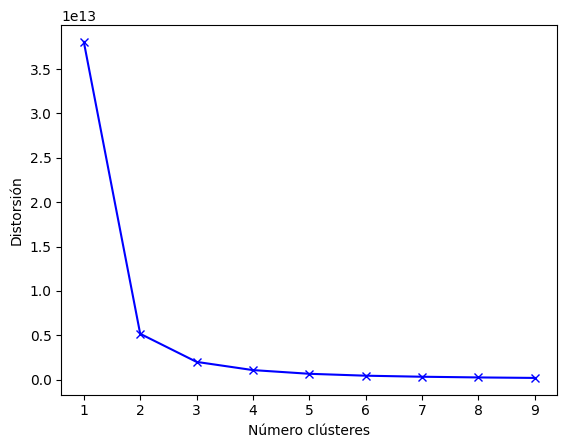

Centroides:
 [[3.83430394e+01 8.34375899e+02 1.77509706e+00]
 [3.88715913e+01 1.45390355e+05 1.38488091e+00]
 [3.90630381e+01 9.91684034e+04 1.38468635e+00]]


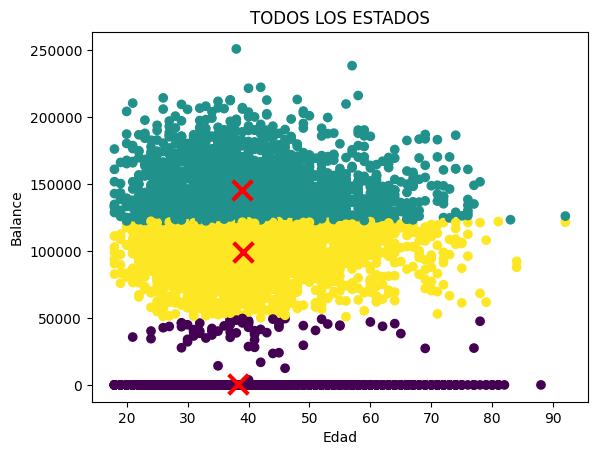

In [111]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#Creamos el conjunto de datos:
X = estados_sin_nulos[['Age', 'Balance', 'NumOfProducts']]
# Método de la dispersión para ver cuántos clúster usar:
# Calculamos la distorsión existente para un rango de 1 a 10 clústeres. n_init es el número de veces que se 
# lanza el algoritmo con diferentes datos iniciales para los centroides
distorsion = [] 

for i in range(1, 10): 
    kmeans = KMeans (n_clusters = i, n_init=10).fit(X) 
    distorsion.append(kmeans.inertia_)
    
#Pintamos la gráfica:
plt.xlabel("Número clústeres")
plt.ylabel("Distorsión")
plt.plot(range(1,10), distorsion, "bx-")
plt.show()

# Hecho esto, comprobamos en el gráfico de dispersión que deberíamos de usar 2 clústeres
# Inicializamos el algoritmo k-means con k = 3 clústeres:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10) 
# Nos aparece un warning que dice que el valor en el futuro de n_init cambiará de 10 a auto, 
#como ahora es 10 por defecto según la documentación, pues lo ponemos para quitar el warning.
                                                          
#Entrenamos el modelo con los datos:
kmeans.fit(X)

#Predecimos la asignación del clúster para cada punto de datos:
labels = kmeans.predict(X)

#Obtenemos los centroides de los clústeres:
centroides = kmeans.cluster_centers_
print("Centroides:\n", centroides)

#Visualizamos los datos y los centroides de los clústeres en un gráfico de dispersión:
plt.scatter(X['Age'], X['Balance'], c=labels)
plt.scatter(centroides[:, 0], centroides[:, 1], marker="x", s=200, linewidths=3, color="r")
# Agregar título al gráfico
plt.title("TODOS LOS ESTADOS")
# Agregar títulos a las leyendas de los ejes
plt.xlabel("Edad")
plt.ylabel("Balance")

plt.show()

#### Probamos la clusterización sin distinción entre estados, pero no nos convenció el resultado, por lo que creemos que sería mejor para la homogeneización de los grupos distinguir por estados.

### `Distinguiendo por estado de Alabama`

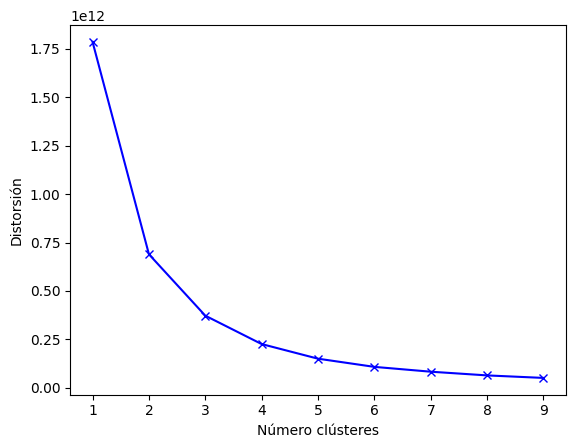

Centroides:
 [[3.96359551e+01 1.05941586e+05 1.50561798e+00]
 [4.01718570e+01 1.31324691e+05 1.50288351e+00]
 [3.82413793e+01 7.36960647e+04 1.57586207e+00]
 [3.89298701e+01 1.61149919e+05 1.55064935e+00]]


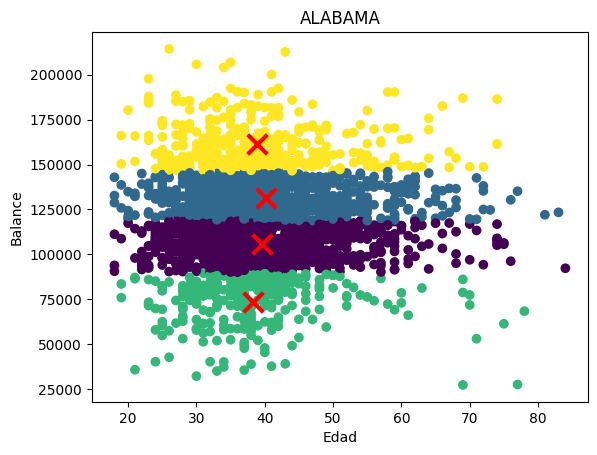

In [112]:
##### ALABAMA:
#Creamos el conjunto de datos para Alabama:
X = selectas_Alabama[['Age', 'Balance', 'NumOfProducts']]

# Método de la dispersión para ver cuántos clúster usar:
# Calculamos la distorsión existente para un rango de 1 a 10 clústeres. 
distorsion = [] 

for i in range(1, 10): 
    kmeans = KMeans (n_clusters = i, n_init=10).fit(X) 
    distorsion.append(kmeans.inertia_)

#Pintamos la gráfica:
plt.xlabel("Número clústeres")
plt.ylabel("Distorsión")
plt.plot(range(1,10), distorsion, "bx-")

plt.show()

# Hecho esto, comprobamos en el gráfico de dispersión que deberíamos de usar 2 clústeres
# Inicializamos el algoritmo k-means con k = 4 clústeres:
kmeans = KMeans (n_clusters=4, random_state=0, n_init=10) 
# Nos aparece un warning que dice que el valor en el futuro de n_init cambiará de 10 a auto, 
#como ahora es 10 por defecto según la documentación, pues lo ponemos para quitar el warning.
                                                          
#Entrenamos el modelo con los datos:
kmeans.fit(X)

#Predecimos la asignación del clúster para cada punto de datos:
labels = kmeans.predict(X)

#Obtenemos los centroides de los clústeres:
centroides = kmeans.cluster_centers_
print("Centroides:\n", centroides)

#Visualizamos los datos y los centroides de los clústeres en un gráfico de dispersión:
plt.scatter(X['Age'], X['Balance'], c=labels)
plt.scatter(centroides[:, 0], centroides[:, 1], marker="x", s=200, linewidths=3, color="r")
# Agregar título al gráfico
plt.title("ALABAMA")
# Agregar títulos a las leyendas de los ejes
plt.xlabel("Edad")
plt.ylabel("Balance")

plt.show()

#### `Conclusión de Alabama:`
- Podemos identificar claramente 4 grupos bien diferenciados según su Balance:
    - El grupo verde que va entre los 25000 y 80000 aprox.
    - El grupo morado que va entre los 80000 y los 120000 aprox.
    - El grupo azul que va entre los 120000 y algo menos de 150000.
    - El grupo amarillo que va entre los 150000 y llega a superar algo más de 200000
- Se puede observar que la mayor concentración de clientes se encuentra entre los 25 y 55 años aproximadamente.
- El importa mínimo de Balance está en 25000, y el importe máximo supera los 200000.
- El rango de edad va entre los 18 y un poco más de 80 años, y se suele concentrar entre los 38 y 40 años.

### `Distinguiendo por estado de California`

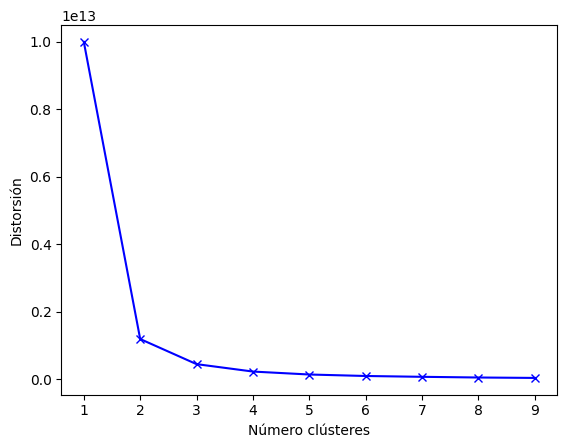

Centroides:
 [[3.87873070e+01 1.47256083e+05 1.32933105e+00]
 [3.82525253e+01 4.53594562e+02 1.78619529e+00]
 [3.92104455e+01 9.72764708e+04 1.28264209e+00]]


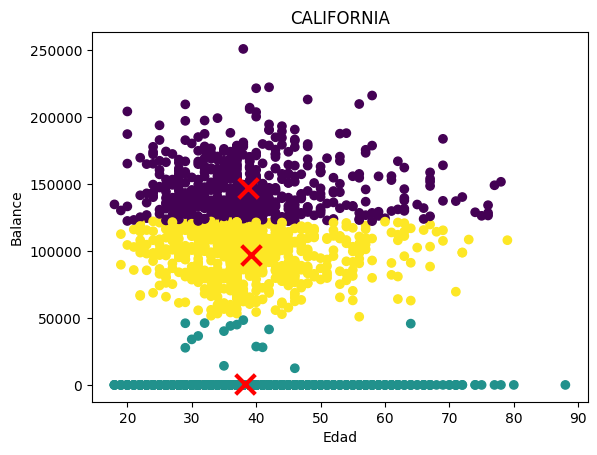

In [113]:
##### CALIFORNIA:
#Creamos el conjunto de datos para California:
X = selectas_California[['Age', 'Balance', 'NumOfProducts']]
# Método de la dispersión para ver cuántos clúster usar:
# Calculamos la distorsión existente para un rango de 1 a 10 clústeres. 
distorsion = [] 

for i in range(1, 10): 
    kmeans = KMeans (n_clusters = i, n_init=10).fit(X) 
    distorsion.append(kmeans.inertia_)

#Pintamos la gráfica:
plt.xlabel("Número clústeres")
plt.ylabel("Distorsión")
plt.plot(range(1,10), distorsion, "bx-")
plt.show()

# Hecho esto, comprobamos en el gráfico de dispersión que deberíamos de usar 2 clústeres
# Inicializamos el algoritmo k-means con k = 3 clústeres:
kmeans = KMeans (n_clusters=3, random_state=0, n_init=10) 
# Nos aparece un warning que dice que el valor en el futuro de n_init cambiará de 10 a auto, 
#como ahora es 10 por defecto según la documentación, pues lo ponemos para quitar el warning.
                                                          
#Entrenamos el modelo con los datos:
kmeans.fit(X)

#Predecimos la asignación del clúster para cada punto de datos:
labels = kmeans.predict(X)

#Obtenemos los centroides de los clústeres:
centroides = kmeans.cluster_centers_
print("Centroides:\n", centroides)

#Visualizamos los datos y los centroides de los clústeres en un gráfico de dispersión:
plt.scatter(X['Age'], X['Balance'], c=labels)
plt.scatter(centroides[:, 0], centroides[:, 1], marker="x", s=200, linewidths=3, color="r")
# Agregar título al gráfico
plt.title("CALIFORNIA")
# Agregar títulos a las leyendas de los ejes
plt.xlabel("Edad")
plt.ylabel("Balance")

plt.show()

#### `Conclusión de California:`
- Podemos identificar claramente 3 grupos bien diferenciados según su Balance:
    - El grupo verde que va entre 0 y 50000 aprox., observando que la mayor cantidad de este grupo tiene Balance 0
    - El grupo amarillo que va entre los 50000 y 125000.
    - El grupo morado que va entre los 125000 y llega a superar los 250000.
- Se puede observar que la mayor concentración de clientes se encuentra entre los 20 y 55 años aproximadamente.
- El importa mínimo de Balance está en 0, y el importe máximo llega a alcanzar o supera los 250000.
- El rango de edad va entre los 18 y un poco más de 80 años, y se suele concentrar entre los 18 y 55 años.

### `Distinguiendo por estado de Texas`

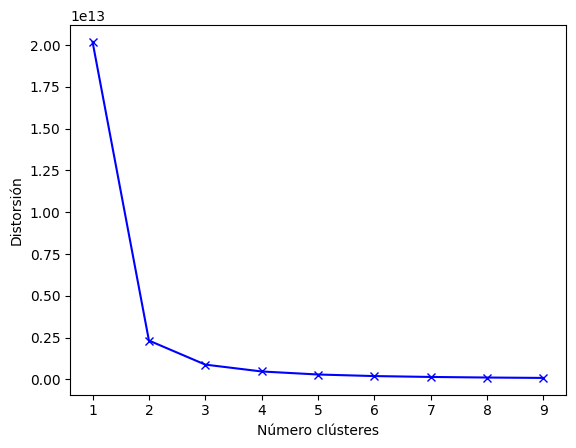

Centroides:
 [[3.83793823e+01 6.55922846e+02 1.77128548e+00]
 [3.81659681e+01 1.46900001e+05 1.29002515e+00]
 [3.86082317e+01 9.80180855e+04 1.29878049e+00]]


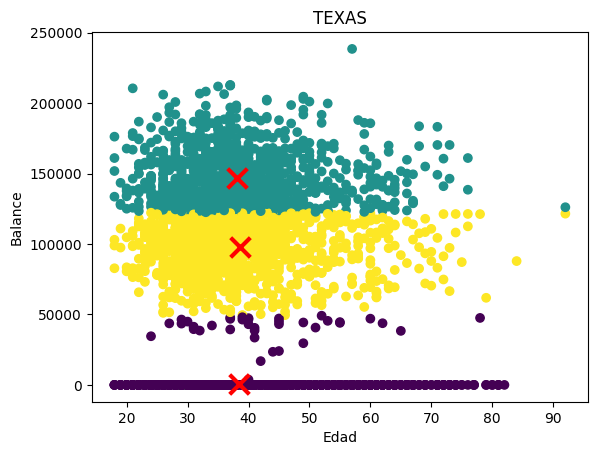

In [114]:
##### TEXAS:
#Creamos el conjunto de datos para Texas:
X = selectas_Texas[['Age', 'Balance', 'NumOfProducts']]

# Método de la dispersión para ver cuántos clúster usar:
# Calculamos la distorsión existente para un rango de 1 a 10 clústeres. 
distorsion = [] 

for i in range(1, 10): 
    kmeans = KMeans (n_clusters = i, n_init=10).fit(X) 
    distorsion.append(kmeans.inertia_)

#Pintamos la gráfica:
plt.xlabel("Número clústeres")
plt.ylabel("Distorsión")
plt.plot(range(1,10), distorsion, "bx-")
plt.show()

# Hecho esto, comprobamos en el gráfico de dispersión que deberíamos de usar 2 clústeres
# Inicializamos el algoritmo k-means con k = 3 clústeres:
kmeans = KMeans (n_clusters=3, random_state=0, n_init=10)
# Nos aparece un warning que dice que el valor en el futuro de n_init cambiará de 10 a auto, 
#como ahora es 10 por defecto según la documentación, pues lo ponemos para quitar el warning.
                                                          
#Entrenamos el modelo con los datos:
kmeans.fit(X)
#Predecimos la asignación del clúster para cada punto de datos:
labels = kmeans.predict(X)

#Obtenemos los centroides de los clústeres:
centroides = kmeans.cluster_centers_
print("Centroides:\n", centroides)

#Visualizamos los datos y los centroides de los clústeres en un gráfico de dispersión:
plt.scatter(X['Age'], X['Balance'], c=labels)
plt.scatter(centroides[:, 0], centroides[:, 1], marker="x", s=200, linewidths=3, color="r")
# Agregar título al gráfico
plt.title("TEXAS")
# Agregar títulos a las leyendas de los ejes
plt.xlabel("Edad")
plt.ylabel("Balance")

plt.show()

#### `Conclusión de Texas:`
- Podemos identificar claramente 3 grupos bien diferenciados según su Balance:
    - El grupo morado que va entre 0 y 50000 aprox., observando que la mayor cantidad de este grupo tiene Balance 0
    - El grupo amarillo que va entre los 50000 y 125000.
    - El grupo verde que va entre los 125000 y llega a superar los 200000.
- Se puede observar que la mayor concentración de clientes se encuentra entre los 20 y 55 años aproximadamente.
- El importa mínimo de Balance está en 0, y el importe máximo llega a superar los 200000.
- El rango de edad va entre los 18 y un poco más de 90 años, pero se suele concentrar entre los 20 y 65 años.
- El grupo amarillo y verde llegan a tener como valores atípicos edades de más de 90 años.

#### `Conclusión general`
Se puede notar que los estados de California y Texas tienen clientes con comportamientos similares, que se distingue de Alabama, por lo que fue correcto distinguir por estados.
Por otra parte, el balance disminuye notablemente a partir de los 60 años en los tres estados, podemos inferir que esto se debe a que coincide con la edad jubilatoria o se empieza a aproximar, y entonces el Balance disminuye.
La media de edad coincide en los tres estados y en términos generales el poder adquisitivo de los clientes es similar, entre 50000 y 200000.
En definitiva, a pesar de que los estados no son colindantes geográficamente, observamos patrones similares entre los clientes de cada uno de ellos, por lo que podemos concluir que las decisiones que se tomen pueden ser las mismas para cada estado y no habría una gran diferencia.
Las variables Age y Balance son las variables de mayor peso para predecir si un cliente se irá o se quedará, que es nuestra target "Exited".

### **Agregamos la matriz de confusión para cada estado a efectos de tener mayor información útil**

#### **MATRIZ DE CONFUSIÓN PARA ALABAMA**

In [115]:
# Generamos datos:
x = selectas_Alabama [['Balance', 'Age']]
y = selectas_Alabama ['Exited']
# Divido los datos en train y test:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#Entrenamos y testeamos
model = LogisticRegression()
model.fit(x_train,y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)

print(matrix)

# Interpretación de la matriz:
# TN  FP  |  493  43
# FN  TP  |  239  28

### Conclusiones para el estado de Alabama:

# True Negatives (TN): Cantidad de veces que el modelo predijo correctamente que el cliente no se iría y efectivamente no se fue. En este caso 493.

# False Positives (FP): Cantidad de veces que el modelo predijo incorrectamente que el cliente se iría cuando en realidad no se fue. En este caso 42.

# False Negatives (FN): Cantidad de veces que el modelo predijo incorrectamente que el cliente se quedaría cuando en realidad se fue. En este caso 239.

# True Positives (TP): Cantidad de veces que el modelo predijo correctamente que el cliente se iría y efectivamente se fue. En este caso 28.

[[493  43]
 [239  28]]


#### **MATRIZ DE CONFUSIÓN PARA CALIFORNIA**

In [116]:
# Generamos datos:
x = selectas_California [['Balance', 'Age']]
y = selectas_California ['Exited']

# Divido los datos en train y test:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#Entrenamos y testeamos
model = LogisticRegression()
model.fit(x_train,y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)

print(matrix)

# Interpretación de la matriz:
# TN  FP  |  769  0
# FN  TP  |   31  0

### Conclusiones para el estado de California:

# True Negatives (TN): Cantidad de veces que el modelo predijo correctamente que el cliente no se iría y efectivamente no se fue. En este caso 769.

# False Positives (FP): Cantidad de veces que el modelo predijo incorrectamente que el cliente se iría cuando en realidad no se fue. En este caso 0.

# False Negatives (FN): Cantidad de veces que el modelo predijo incorrectamente que el cliente se quedaría cuando en realidad se fue. En este caso 31.

# True Positives (TP): Cantidad de veces que el modelo predijo correctamente que el cliente se iría y efectivamente se fue. En este caso 0.

[[769   0]
 [ 31   0]]


#### **MATRIZ DE CONFUSIÓN PARA TEXAS**

In [117]:
# Generamos datos:
x = selectas_Texas [['Balance', 'Age']]
y = selectas_Texas ['Exited']

# Divido los datos en train y test:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#Entrenamos y testeamos
model = LogisticRegression()
model.fit(x_train,y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)

print(matrix)

# Interpretación de la matriz:
# TN  FP  |  1352  0
# FN  TP  |   266  0

### Conclusiones para el estado de Texas:

# True Negatives (TN): Cantidad de veces que el modelo predijo correctamente que el cliente no se iría y efectivamente no se fue. En este caso 1352.

# False Positives (FP): Cantidad de veces que el modelo predijo incorrectamente que el cliente se iría cuando en realidad no se fue. En este caso 0.

# False Negatives (FN): Cantidad de veces que el modelo predijo incorrectamente que el cliente se quedaría cuando en realidad se fue. En este caso 266.

# True Positives (TP): Cantidad de veces que el modelo predijo correctamente que el cliente se iría y efectivamente se fue. En este caso 0.

[[1352    0]
 [ 266    0]]
